In [2]:
import json
import os
import unicodedata
import sys
import pandas as pd
import matplotlib.pyplot as plt
import re
sys.path.append("..")
from scripts._mecab import Mecab
from typing import Dict, List, Tuple


# sys.path.insert(0, '.')


In [3]:
from tokenizer import (
    # CharTokenizer,
    # JamoTokenizer,
    MeCabSentencePieceTokenizer_orig,
    MeCabSentencePieceTokenizer_fixed,
    MeCabSentencePieceTokenizer,
    MeCabWordPieceTokenizer,
    # MeCabTokenizer,
    MeCabTokenizer_orig,
    MeCabTokenizer_fixed,
    MeCabTokenizer_all,
    # MeCabSentencePieceTokenizer_kortok,
    # MeCabTokenizer_kortok,
    SentencePieceTokenizer,
    WordPieceTokenizer,
    Vocab,
    # WordTokenizer,
)

In [4]:
def get_tokenizer(token_type: str, tokenizer_type: str, decomposition_type: str, space_symbol: str = "", dummy_letter: str = "", grammatical_symbol: list = ["", ""]):
    use_grammatical_symbol = "grammatical_symbol_F" if grammatical_symbol == ["", ""] else "grammatical_symbol_T"

    wp_path = "../resources/v6_without_dummy_letter_" + use_grammatical_symbol
    sub_path = "_".join([token_type, tokenizer_type, decomposition_type, use_grammatical_symbol, "wp-64k"]) + "/bert_tokenizer.json"

    model_path = wp_path + "/" + sub_path
    # print(f"\nmodel path: {model_path}\n")

    wp = WordPieceTokenizer(model_path)

    if (token_type == "eojeol") and (decomposition_type == "composed"):
        tokenizer = wp

    else:
        mecab = MeCabTokenizer_all(token_type=token_type, tokenizer_type=tokenizer_type,
                           decomposition_type=decomposition_type,
                           space_symbol=space_symbol, dummy_letter=dummy_letter,
                           nfd=True, grammatical_symbol=grammatical_symbol)

        tokenizer = MeCabWordPieceTokenizer(mecab=mecab, wp=wp)  # mecab_wp.py

    return tokenizer

In [5]:
def get_tokenized_result(tokenizer, string, nfd: bool = True):
    # if nfd == True:
    #     string = str_to_nfd(string)

    tokenized = tokenizer.tokenize(string)
    # print(" ".join(tokenized))
    
    return " ".join(tokenized)

In [6]:
tokenizer_eojeol_composed_F = get_tokenizer(token_type = "eojeol", tokenizer_type = "mecab_fixed", decomposition_type = "composed", grammatical_symbol = ["", ""])
tokenizer_eojeol_pure_F = get_tokenizer(token_type = "eojeol", tokenizer_type = "mecab_fixed", decomposition_type = "decomposed_pure", grammatical_symbol = ["", ""])
tokenizer_orig_composed_F = get_tokenizer(token_type = "morpheme", tokenizer_type = "mecab_orig", decomposition_type = "composed", grammatical_symbol = ["", ""])
tokenizer_orig_pure_F = get_tokenizer(token_type = "morpheme", tokenizer_type = "mecab_orig", decomposition_type = "decomposed_pure", grammatical_symbol = ["", ""])
tokenizer_fixed_composed_F = get_tokenizer(token_type = "morpheme", tokenizer_type = "mecab_fixed", decomposition_type = "composed", grammatical_symbol = ["", ""])
tokenizer_fixed_pure_F = get_tokenizer(token_type = "morpheme", tokenizer_type = "mecab_fixed", decomposition_type = "decomposed_pure", grammatical_symbol = ["", ""])
tokenizer_fixed_grammatical_F = get_tokenizer(token_type = "morpheme", tokenizer_type = "mecab_fixed", decomposition_type = "decomposed_grammatical", grammatical_symbol = ["", ""])
tokenizer_fixed_lexical_F = get_tokenizer(token_type = "morpheme", tokenizer_type = "mecab_fixed", decomposition_type = "decomposed_lexical", grammatical_symbol = ["", ""])
# tokenizer_fixed_composed_T = get_tokenizer(token_type = "morpheme", tokenizer_type = "mecab_fixed", decomposition_type = "composed", grammatical_symbol = ["⫸", "⭧"])
# tokenizer_fixed_pure_T = get_tokenizer(token_type = "morpheme", tokenizer_type = "mecab_fixed", decomposition_type = "decomposed_pure", grammatical_symbol = ["⫸", "⭧"])
# tokenizer_fixed_grammatical_T = get_tokenizer(token_type = "morpheme", tokenizer_type = "mecab_fixed", decomposition_type = "decomposed_grammatical", grammatical_symbol = ["⫸", "⭧"])
# tokenizer_fixed_lexical_T = get_tokenizer(token_type = "morpheme", tokenizer_type = "mecab_fixed", decomposition_type = "decomposed_lexical", grammatical_symbol = ["⫸", "⭧"])


In [7]:
def show_tokenizations(string):
    # grammatical symbol F
    eojeol_composed_F = string + '\t' + 'eojeol_composed_F' + '\t' + get_tokenized_result(tokenizer_eojeol_composed_F, string)
    eojeol_pure_F = string + '\t' + 'eojeol_pure_F' + '\t' + get_tokenized_result(tokenizer_eojeol_pure_F, string)
    orig_composed_F = string + '\t' + 'orig_composed_F' + '\t' + get_tokenized_result(tokenizer_orig_composed_F, string)
    orig_pure_F = string + '\t' + 'orig_pure_F' + '\t' + get_tokenized_result(tokenizer_orig_pure_F, string)
    fixed_composed_F = string + '\t' + 'fixed_composed_F' + '\t' + get_tokenized_result(tokenizer_fixed_composed_F, string)
    fixed_pure_F = string + '\t' + 'fixed_pure_F' + '\t' + get_tokenized_result(tokenizer_fixed_pure_F, string)
    fixed_grammatical_F = string + '\t' + 'fixed_grammatical_F' + '\t' + get_tokenized_result(tokenizer_fixed_grammatical_F, string)
    fixed_lexical_F = string + '\t' + 'fixed_lexical_F' + '\t' + get_tokenized_result(tokenizer_fixed_lexical_F, string)

#     # grammatical symbol T
#     fixed_composed_T = string + '\t' + 'fixed_composed_T' + '\t' + get_tokenized_result(tokenizer_fixed_composed_T, string)
#     fixed_pure_T = string + '\t' + 'fixed_pure_T' + '\t'+ get_tokenized_result(tokenizer_fixed_pure_T, string)
#     fixed_grammatical_T = string + '\t' + 'fixed_grammatical_T' + '\t' + get_tokenized_result(tokenizer_fixed_grammatical_T, string)
#     fixed_lexical_T = string + '\t' + 'fixed_lexical_T' + '\t' + get_tokenized_result(tokenizer_fixed_lexical_T, string)

    return "\n".join(['\n'+eojeol_composed_F, eojeol_pure_F, orig_composed_F, orig_pure_F, fixed_composed_F, fixed_pure_F, fixed_grammatical_F, fixed_lexical_F])
#     return "\n".join(['\n'+orig_pure_F])

In [71]:
# 토큰화 및 저장
def analysis(task, corpus_list, corpus_name_list, sent2=True):
    for corpus, corpus_name in zip(corpus_list, corpus_name_list):
        with open(task+'_'+corpus_name+'.tsv', 'w', encoding='utf-8') as f:
            f.write('source'+'\t'+'tokenizer'+'\t'+'tokenize_result')
            
            if sent2:
                for sent1, sent2 in zip(corpus[0], corpus[1]):
                    f.write(show_tokenizations(string=sent1))
                    f.write(show_tokenizations(string=sent2))
            else:
                for sent1 in (corpus[0]):
                    f.write(show_tokenizations(string=sent1))

In [9]:
# 길이가 128 초과인 개수 카운트

def length_count(df_list, df_name_list):
    
    for df, df_name in zip(df_list, df_name_list):
        limit = (df['tokenized_len'] > 128)
        cnt = df.loc[limit, 'tokenize_result'].count()
        print(df_name, cnt)

## KORSTS

In [45]:
def load_data(file_path: str) -> Tuple[List[str], List[str]]:
    """
    file_path에 존재하는 tsv를 읽어서 bert_data.InputIds 형태로 변경해주는 함수입니다.
    각각의 row를 bert input으로 바꾸어주기 위한 함수입니다.
    각 row는 아래처럼 구성되어야 합니다.
    1. sentence_a
    2. sentence_b
    3. label
    """
    sentence_as = []
    sentence_bs = []
    #labels = []

    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f.readlines()[1:]):
            splitted = line.strip().split("\t")
            if len(splitted) != 7:
                #print(f"[ERROR] {repr(line)}, line {i}")
                continue
            sentence_as.append(splitted[5])
            sentence_bs.append(splitted[6])
            #labels.append(float(splitted[4]))

    return sentence_as, sentence_bs

In [66]:
task = 'korsts'
train = load_data('../dataset/nlu_tasks/korsts/sts-train.tsv')
dev = load_data('../dataset/nlu_tasks/korsts/sts-dev.tsv')
test = load_data('../dataset/nlu_tasks/korsts/sts-test.tsv')

corpus_list = [train, dev, test]
corpus_name_list = ['train', 'dev', 'test']

In [47]:
analysis(task, corpus_list, corpus_name_list)

In [128]:
# 길이 재기
df_train = pd.read_csv('korsts_train.csv', delimiter='\t')
df_dev = pd.read_csv('korsts_dev.csv', delimiter='\t')
df_test = pd.read_csv('korsts_test.csv', delimiter='\t')

In [130]:
# 길이 칼럼 추가
df_train['source_len'] = df_train['source'].apply(lambda x: len(str(x).split()))
df_train['tokenized_len'] = df_train['tokenize_result'].apply(lambda x: len(str(x).split()))

df_dev['source_len'] = df_dev['source'].apply(lambda x: len(str(x).split()))
df_dev['tokenized_len'] = df_dev['tokenize_result'].apply(lambda x: len(str(x).split()))

df_test['source_len'] = df_test['source'].apply(lambda x: len(str(x).split()))
df_test['tokenized_len'] = df_test['tokenize_result'].apply(lambda x: len(str(x).split()))

In [131]:
df_train

,source,tokenizer,tokenize_result,source_len,tokenized_len
0,비행기가 이륙하고 있다.,eojeol_composed_F,비행기가 이륙 ##하고 있다.,3,4
1,비행기가 이륙하고 있다.,eojeol_pure_F,비행기가 이륙 ##하고 있다.,3,4
2,비행기가 이륙하고 있다.,orig_composed_F,비행기 가 이륙 하 고 있 다 .,3,8
3,비행기가 이륙하고 있다.,orig_pure_F,비행기 가 이륙 하 고 있 다 .,3,8
4,비행기가 이륙하고 있다.,fixed_composed_F,비행기 가 이륙 하 고 있 다 .,3,8
...,...,...,...,...,...
137971,가장 최근의 심한 날씨 : 토네이도 후 텍사스에서 1명 사망,fixed_lexical_F,가장 최근 의 심하 ᆫ 날씨 : 토네이도 후 텍ᄉ...,10,14
137972,가장 최근의 심한 날씨 : 토네이도 후 텍사스에서 1명 사망,fixed_composed_T,가장 최근 ⫸의 심하 ⭧ᆫ 날씨 : 토네이도 후 텍사스 ⫸에서 1 명 사망,10,14
137973,가장 최근의 심한 날씨 : 토네이도 후 텍사스에서 1명 사망,fixed_pure_T,가장 최근 ⫸의 심하 ⭧ᆫ 날씨 : 토네이도 후 ᄐ...,10,14
137974,가장 최근의 심한 날씨 : 토네이도 후 텍사스에서 1명 사망,fixed_grammatical_T,가장 최근 ⫸의 심하 ⭧ᆫ 날씨 : 토네이도 후 텍사스 ⫸에서 1 명 사망,10,14


In [132]:
# 기초 통계
df_train.describe()

,source_len,tokenized_len
count,137976.000000,137976.000000
mean,7.536861,14.965617
std,3.998581,8.787604
min,1.000000,1.000000
25%,5.000000,9.000000
50%,6.000000,12.000000
75%,9.000000,18.000000
max,56.000000,78.000000


In [133]:
df_dev.describe()

,source_len,tokenized_len
count,36000.000000,36000.000000
mean,8.744278,17.518806
std,4.246743,9.234143
min,2.000000,1.000000
25%,6.000000,10.000000
50%,8.000000,15.000000
75%,11.000000,23.000000
max,56.000000,64.000000


In [134]:
df_test.describe()

,source_len,tokenized_len
count,33096.000000,33096.000000
mean,7.682348,15.120770
std,4.027971,8.497679
min,2.000000,1.000000
25%,5.000000,10.000000
50%,7.000000,12.000000
75%,9.000000,18.000000
max,78.000000,59.000000


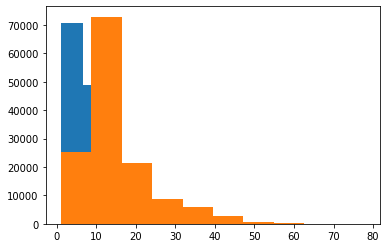

In [135]:
# 문장 길이 히스토그램

plt.hist(df_train['source_len'], bins=10)
plt.hist(df_train['tokenized_len'], bins=10)
plt.show()

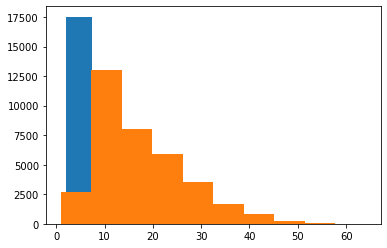

In [136]:
plt.hist(df_dev['source_len'], bins=10)
plt.hist(df_dev['tokenized_len'], bins=10)
plt.show()

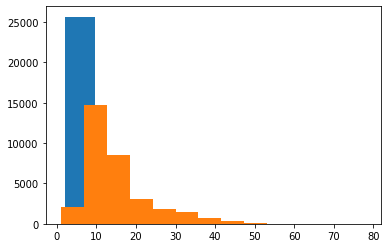

In [137]:
plt.hist(df_test['source_len'], bins=10)
plt.hist(df_test['tokenized_len'], bins=10)
plt.show()

In [146]:
# 128 넘는 개수
df_list = [df_train, df_dev, df_test]
df_name_list = ['train', 'dev', 'test']
length_count(df_list, df_name_list)

train 0
dev 0
test 0


In [ ]:
# 토크나이저별 문장 길이
train_grouped = df_train.groupby(['tokenizer'])
dev_grouped = df_dev.groupby(['tokenizer'])
test_grouped = df_test.groupby(['tokenizer'])

In [ ]:
train_grouped.boxplot

In [ ]:
dev_grouped.boxplot

In [ ]:
test_grouped.boxplot

## cola

In [164]:
def load_data(file_path: str) -> Tuple[List[str]]:
    """
    file_path에 존재하는 tsv를 읽어서 bert_data.InputIds 형태로 변경해주는 함수입니다.
    각각의 row를 bert input으로 바꾸어주기 위한 함수입니다.
    각 row는 아래처럼 구성되어야 합니다.
    1. sentence
    3. label
    """
    sentences: List[str] = []

    # for test set
    if file_path == "../dataset/nlu_tasks/cola/NIKL_CoLA_in_domain_test_with_answer.tsv":
        with open(file_path, "r", encoding="utf-8") as f:
            for i, line in enumerate(f.readlines()[1:]):
                splitted = line.strip().split("\t")
                sentences.append(splitted[2])

    else:
        with open(file_path, "r", encoding="utf-8") as f:
            for i, line in enumerate(f.readlines()[1:]):
                splitted = line.strip().split("\t")
                sentences.append(splitted[3])

    return sentences

In [165]:
task = 'cola'
train = load_data('../dataset/nlu_tasks/cola/NIKL_CoLA_in_domain_train.tsv')
dev = load_data('../dataset/nlu_tasks/cola/NIKL_CoLA_in_domain_dev.tsv')
test = load_data('../dataset/nlu_tasks/cola/NIKL_CoLA_in_domain_test_with_answer.tsv')

corpus_list = [train, dev, test]
corpus_name_list = ['train', 'dev', 'test']

In [167]:
analysis(task, corpus_list, corpus_name_list, sent2=False)

In [168]:
# 길이 재기
df_train = pd.read_csv('cola_train.csv', delimiter='\t')
df_dev = pd.read_csv('cola_dev.csv', delimiter='\t')
df_test = pd.read_csv('cola_test.csv', delimiter='\t')

# 길이 칼럼 추가
df_train['source_len'] = df_train['source'].apply(lambda x: len(str(x).split()))
df_train['tokenized_len'] = df_train['tokenize_result'].apply(lambda x: len(str(x).split()))

df_dev['source_len'] = df_dev['source'].apply(lambda x: len(str(x).split()))
df_dev['tokenized_len'] = df_dev['tokenize_result'].apply(lambda x: len(str(x).split()))

df_test['source_len'] = df_test['source'].apply(lambda x: len(str(x).split()))
df_test['tokenized_len'] = df_test['tokenize_result'].apply(lambda x: len(str(x).split()))

In [169]:
# 기초 통계
df_train.describe()

,source_len,tokenized_len
count,190512.000000,190512.000000
mean,5.002016,11.015091
std,1.832186,4.053085
min,1.000000,2.000000
25%,4.000000,8.000000
50%,5.000000,10.000000
75%,6.000000,13.000000
max,16.000000,39.000000


In [170]:
df_dev.describe()

,source_len,tokenized_len
count,12720.000000,12720.000000
mean,5.051887,11.126808
std,1.875975,4.192218
min,2.000000,2.000000
25%,4.000000,8.000000
50%,5.000000,10.000000
75%,6.000000,13.000000
max,13.000000,30.000000


In [171]:
df_test.describe()

,source_len,tokenized_len
count,12720.00000,12720.000000
mean,5.10566,11.178145
std,1.88451,4.173627
min,2.00000,2.000000
25%,4.00000,8.000000
50%,5.00000,11.000000
75%,6.00000,13.000000
max,13.00000,30.000000


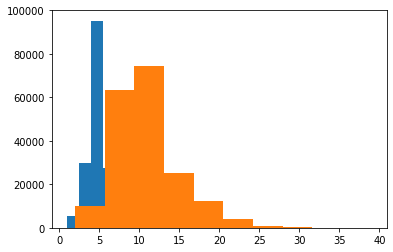

In [172]:
# 문장 길이 히스토그램

plt.hist(df_train['source_len'], bins=10)
plt.hist(df_train['tokenized_len'], bins=10)
plt.show()

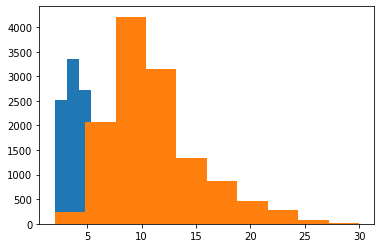

In [173]:
# 문장 길이 히스토그램

plt.hist(df_dev['source_len'], bins=10)
plt.hist(df_dev['tokenized_len'], bins=10)
plt.show()

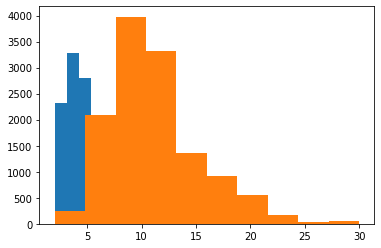

In [174]:
# 문장 길이 히스토그램

plt.hist(df_test['source_len'], bins=10)
plt.hist(df_test['tokenized_len'], bins=10)
plt.show()

In [175]:
# 128 넘는 개수
df_list = [df_train, df_dev, df_test]
df_name_list = ['train', 'dev', 'test']
length_count(df_list, df_name_list)

train 0
dev 0
test 0


In [ ]:
# 토크나이저별 문장 길이
train_grouped = df_train.groupby(['tokenizer'])
dev_grouped = df_dev.groupby(['tokenizer'])
test_grouped = df_test.groupby(['tokenizer'])

In [ ]:
train_grouped.boxplot

In [ ]:
dev_grouped.boxplot

In [ ]:
test_grouped.boxplot

## paws

In [178]:
def load_data(file_path: str) -> Tuple[List[str], List[str]]:
    """
    file_path에 존재하는 tsv를 읽어서 bert_data.InputIds 형태로 변경해주는 함수입니다.
    각각의 row를 bert input으로 바꾸어주기 위한 함수입니다.
    각 row는 아래처럼 구성되어야 합니다.
    1. sentence_a
    2. sentence_b
    3. label
    """
    sentence_as = []
    sentence_bs = []

    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f.readlines()[1:]):
            splitted = line.strip().split("\t")
            if len(splitted) != 4:
                #print(f"[ERROR] {repr(line)}, line {i}")
                continue
            if splitted[1] == "" or splitted[2] == "":
                #print(f"[ERROR] {repr(line)}, line {i}")
                continue
            # 문장이 "NS"로만 표기된 라인 제외
            if splitted[1] == "NS" or splitted[2] == "NS":
                #print(f"[ERROR] {repr(line)}, line {i}")
                continue
            sentence_as.append(splitted[1])
            sentence_bs.append(splitted[2])
        
    return sentence_as, sentence_bs

In [179]:
task = 'paws'
train = load_data('../dataset/nlu_tasks/paws/translated_train.tsv')
dev = load_data('../dataset/nlu_tasks/paws/dev_2k.tsv')
test = load_data('../dataset/nlu_tasks/paws/test_2k.tsv')

corpus_list = [train, dev, test]
corpus_name_list = ['train', 'dev', 'test']

In [180]:
analysis(task, corpus_list, corpus_name_list, sent2=True)

In [181]:
# 길이 재기
df_train = pd.read_csv('paws_train.csv', delimiter='\t')
df_dev = pd.read_csv('paws_dev.csv', delimiter='\t')
df_test = pd.read_csv('paws_test.csv', delimiter='\t')

# 길이 칼럼 추가
df_train['source_len'] = df_train['source'].apply(lambda x: len(str(x).split()))
df_train['tokenized_len'] = df_train['tokenize_result'].apply(lambda x: len(str(x).split()))

df_dev['source_len'] = df_dev['source'].apply(lambda x: len(str(x).split()))
df_dev['tokenized_len'] = df_dev['tokenize_result'].apply(lambda x: len(str(x).split()))

df_test['source_len'] = df_test['source'].apply(lambda x: len(str(x).split()))
df_test['tokenized_len'] = df_test['tokenize_result'].apply(lambda x: len(str(x).split()))

In [182]:
# 기초 통계
df_train.describe()

,source_len,tokenized_len
count,1.179096e+06,1.179096e+06
mean,1.439840e+01,3.108884e+01
std,4.789153e+00,1.035804e+01
min,2.000000e+00,1.000000e+00
25%,1.100000e+01,2.400000e+01
50%,1.400000e+01,3.000000e+01
75%,1.800000e+01,3.800000e+01
max,6.600000e+01,9.400000e+01


In [183]:
# 기초 통계
df_dev.describe()

,source_len,tokenized_len
count,47160.000000,47160.000000
mean,12.714249,29.864843
std,3.760423,9.262415
min,1.000000,2.000000
25%,10.000000,23.000000
50%,12.000000,29.000000
75%,15.000000,36.000000
max,29.000000,74.000000


In [184]:
# 기초 통계
df_test.describe()

,source_len,tokenized_len
count,47328.000000,47328.000000
mean,12.736372,30.058232
std,3.699866,9.267589
min,3.000000,1.000000
25%,10.000000,23.000000
50%,13.000000,30.000000
75%,15.000000,36.000000
max,41.000000,72.000000


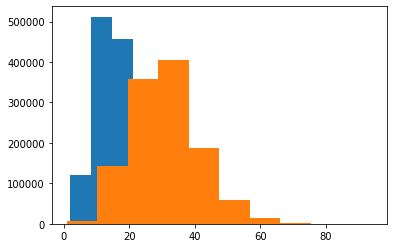

In [185]:
# 문장 길이 히스토그램

plt.hist(df_train['source_len'], bins=10)
plt.hist(df_train['tokenized_len'], bins=10)
plt.show()

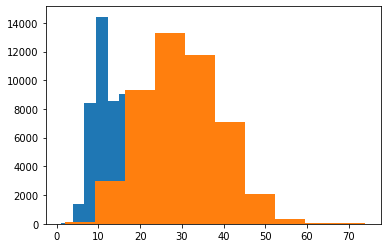

In [186]:
# 문장 길이 히스토그램

plt.hist(df_dev['source_len'], bins=10)
plt.hist(df_dev['tokenized_len'], bins=10)
plt.show()

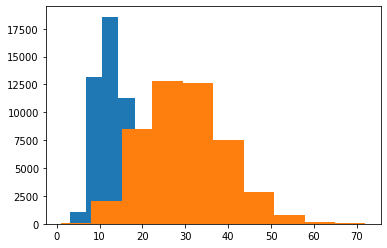

In [187]:
# 문장 길이 히스토그램

plt.hist(df_test['source_len'], bins=10)
plt.hist(df_test['tokenized_len'], bins=10)
plt.show()

In [188]:
# 128 넘는 개수
df_list = [df_train, df_dev, df_test]
df_name_list = ['train', 'dev', 'test']
length_count(df_list, df_name_list)

train 0
dev 0
test 0


In [ ]:
# 토크나이저별 문장 길이
train_grouped = df_train.groupby(['tokenizer'])
dev_grouped = df_dev.groupby(['tokenizer'])
test_grouped = df_test.groupby(['tokenizer'])

In [ ]:
train_grouped.boxplot

In [ ]:
dev_grouped.boxplot

In [ ]:
test_grouped.boxplot

## nsmc

In [189]:
from quickspacer import Spacer
spacer = Spacer()
spacing = True

def load_data(file_path: str) -> Tuple[List[str], List[int]]:
    """
    file_path에 존재하는 tsv를 읽어서 bert_data.InputIds 형태로 변경해주는 함수입니다.
    각각의 row를 bert input으로 바꾸어주기 위한 함수입니다.
    각 row는 아래처럼 구성되어야 합니다.
    1. sentence
    3. label
    """
    sentences: List[str] = []
    labels: List[int] = []

    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f.readlines()[1:]):
            splitted = line.strip().split("\t")
            if len(splitted) != 2:
                #print(f"[ERROR] {repr(line)}, line {i}")
                continue
            # 띄어쓰기
            if spacing:
                splitted[0] = spacer.space([splitted[0]])[0]
                sentences.append(splitted[0])
            else:
                sentences.append(splitted[0])
            
#             labels.append(label_to_index[splitted[1]])

    return sentences

2022-01-19 14:31:36.148107: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-19 14:31:36.984670: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-01-19 14:31:37.018683: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-19 14:31:37.019084: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:23:00.0 name: NVIDIA GeForce GTX 1070 Ti computeCapability: 6.1
coreClock: 1.683GHz coreCount: 19 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 238.66GiB/s
2022-01-19 14:31:37.019105: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-01-19 14:31:37.019213: W tensorflow/stream_executo

In [190]:
task = 'nsmc'
train = load_data('../dataset/nlu_tasks/nsmc/ratings_train.tsv')
dev = load_data('../dataset/nlu_tasks/nsmc/ratings_dev.tsv')
test = load_data('../dataset/nlu_tasks/nsmc/ratings_test.tsv')

corpus_list = [train, dev, test]
corpus_name_list = ['train', 'dev', 'test']

In [191]:
analysis(task, corpus_list, corpus_name_list, sent2=False)

In [467]:
# 길이 재기
df_train = pd.read_csv('nsmc_train.csv', delimiter='\t')
df_dev = pd.read_csv('nsmc_dev.csv', delimiter='\t')
df_test = pd.read_csv('nsmc_test.csv', delimiter='\t')

# 길이 칼럼 추가
df_train['source_len'] = df_train['source'].apply(lambda x: len(str(x).split()))
df_train['tokenized_len'] = df_train['tokenize_result'].apply(lambda x: len(str(x).split()))

df_dev['source_len'] = df_dev['source'].apply(lambda x: len(str(x).split()))
df_dev['tokenized_len'] = df_dev['tokenize_result'].apply(lambda x: len(str(x).split()))

df_test['source_len'] = df_test['source'].apply(lambda x: len(str(x).split()))
df_test['tokenized_len'] = df_test['tokenize_result'].apply(lambda x: len(str(x).split()))

In [468]:
# 기초 통계
df_train.describe()

,source_len,tokenized_len
count,1.619964e+06,1.619964e+06
mean,9.693386e+00,1.986318e+01
std,7.985438e+00,1.671216e+01
min,1.000000e+00,1.000000e+00
25%,4.000000e+00,9.000000e+00
50%,7.000000e+00,1.500000e+01
75%,1.200000e+01,2.400000e+01
max,6.600000e+01,1.400000e+02


In [469]:
# 기초 통계
df_dev.describe()

,source_len,tokenized_len
count,179976.000000,179976.000000
mean,9.625950,19.650448
std,7.977469,16.652027
min,1.000000,1.000000
25%,4.000000,9.000000
50%,7.000000,15.000000
75%,12.000000,24.000000
max,54.000000,140.000000


In [470]:
# 기초 통계
df_test.describe()

,source_len,tokenized_len
count,599964.000000,599964.000000
mean,9.728684,19.855061
std,8.021759,16.650754
min,1.000000,1.000000
25%,5.000000,9.000000
50%,7.000000,15.000000
75%,12.000000,24.000000
max,52.000000,116.000000


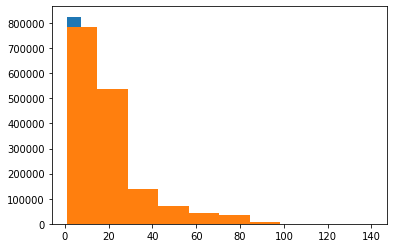

In [471]:
# 문장 길이 히스토그램

plt.hist(df_train['source_len'], bins=10)
plt.hist(df_train['tokenized_len'], bins=10)
plt.show()

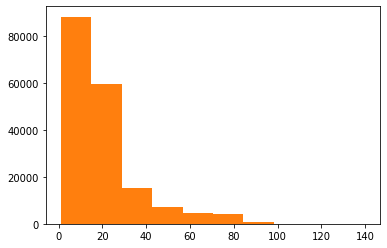

In [472]:
# 문장 길이 히스토그램

plt.hist(df_dev['source_len'], bins=10)
plt.hist(df_dev['tokenized_len'], bins=10)
plt.show()

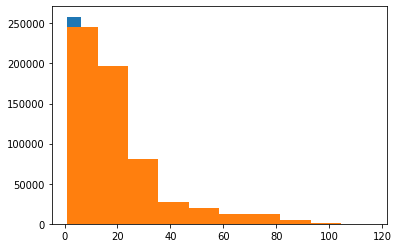

In [473]:
# 문장 길이 히스토그램

plt.hist(df_test['source_len'], bins=10)
plt.hist(df_test['tokenized_len'], bins=10)
plt.show()

In [474]:
# 128 넘는 개수
df_list = [df_train, df_dev, df_test]
df_name_list = ['train', 'dev', 'test']
length_count(df_list, df_name_list)

train 19
dev 10
test 0


In [475]:
# 토크나이저별 문장 길이
train_grouped = df_train.groupby(['tokenizer'])
dev_grouped = df_dev.groupby(['tokenizer'])
test_grouped = df_test.groupby(['tokenizer'])

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

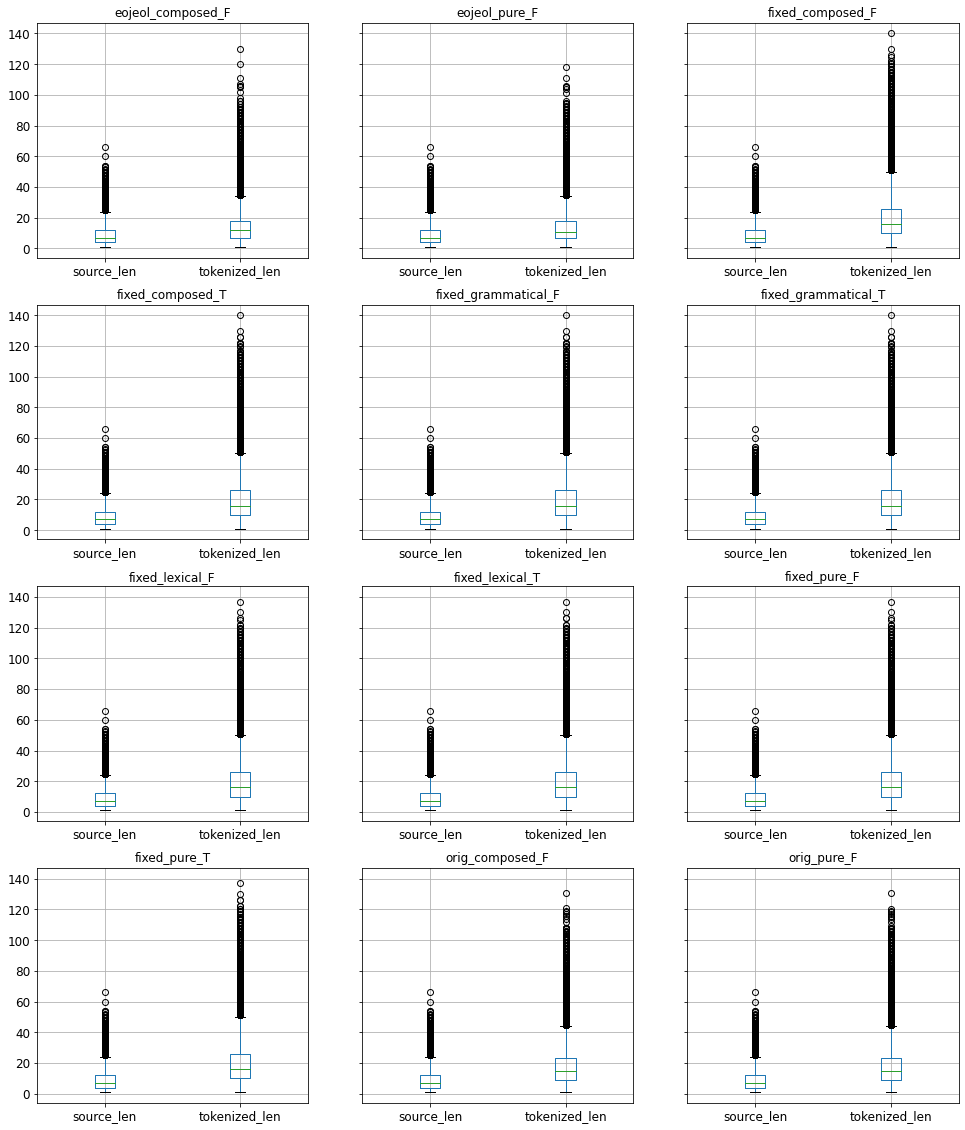

In [485]:
train_grouped.boxplot(fontsize=12, figsize=(16, 20))

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

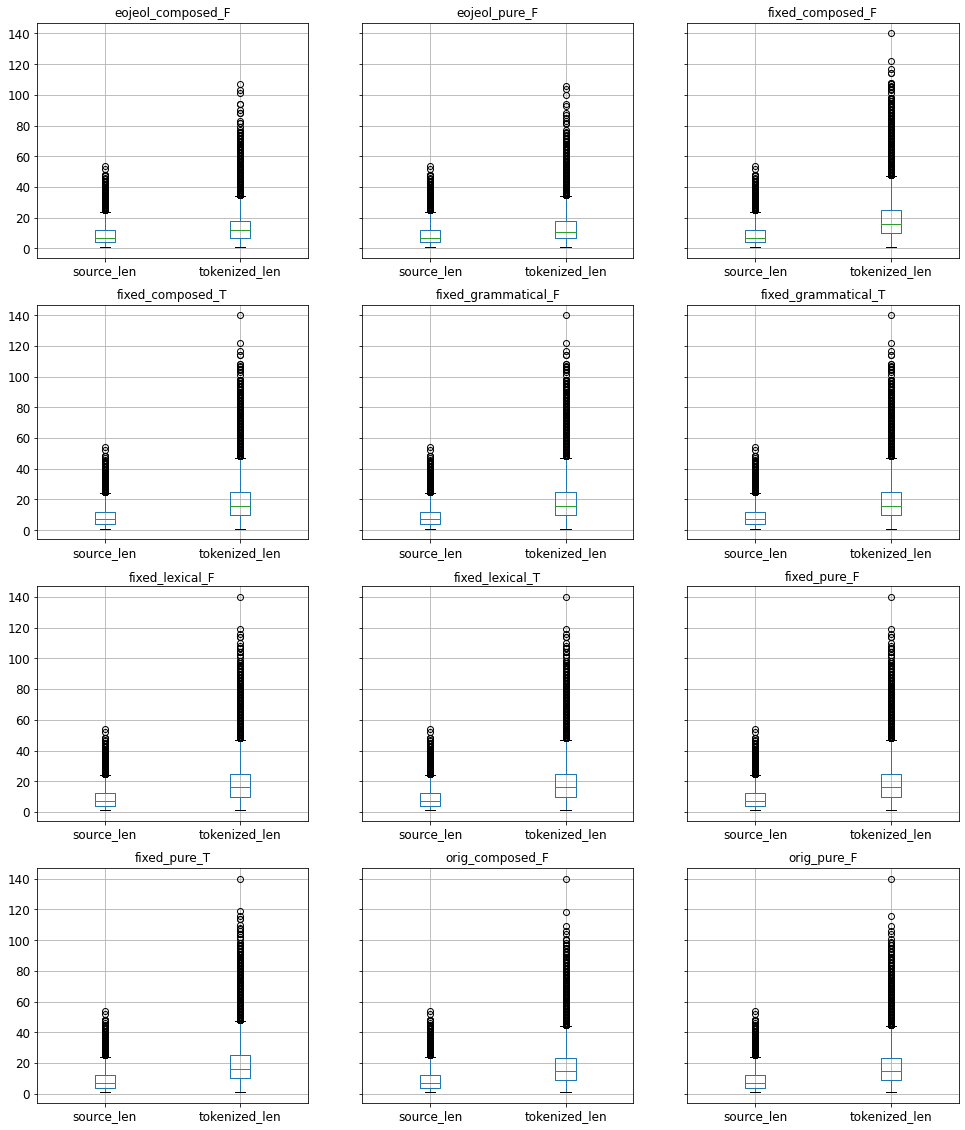

In [486]:
dev_grouped.boxplot(fontsize=12, figsize=(16, 20))

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

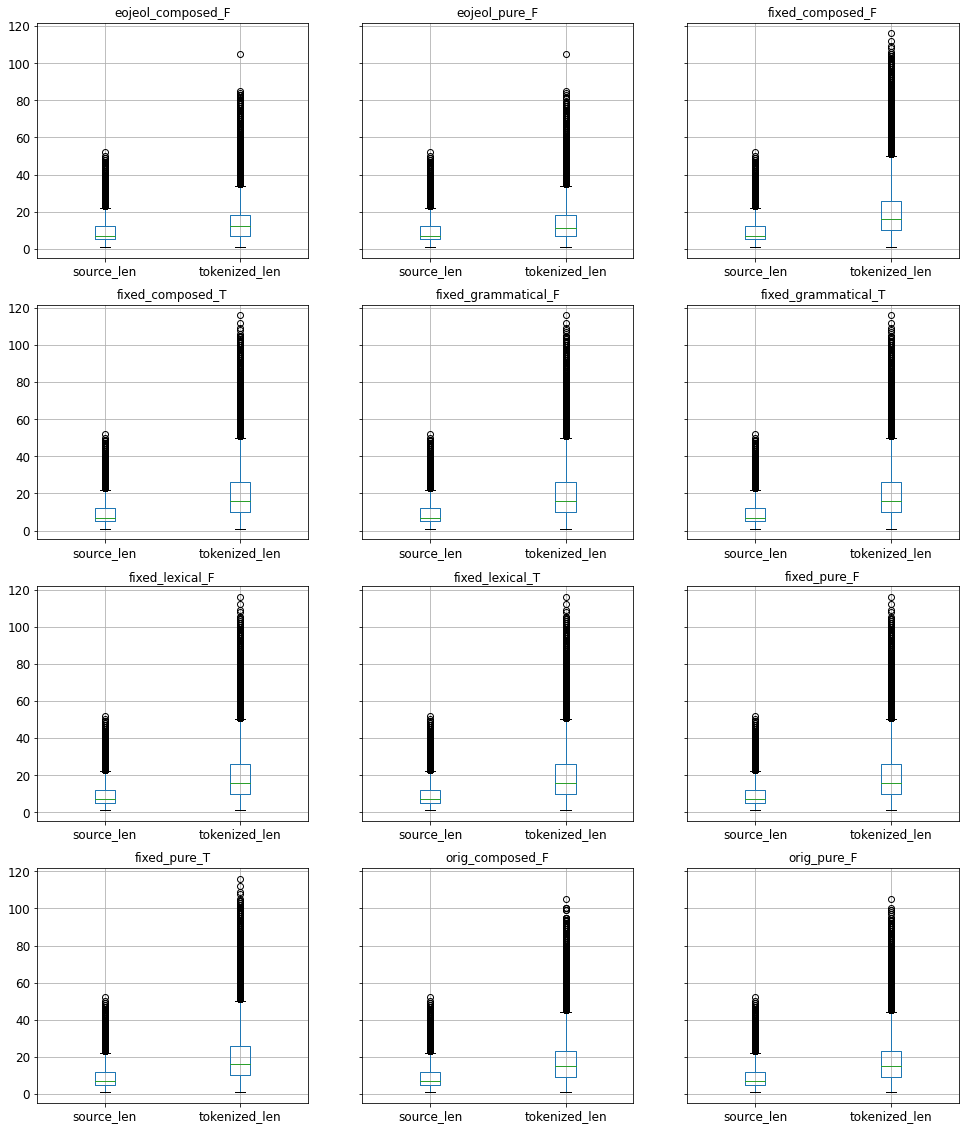

In [487]:
test_grouped.boxplot(fontsize=12, figsize=(16, 20))

In [479]:
train_grouped.describe()

source_len                                                 \
                         count      mean       std  min  25%  50%   75%   max   
tokenizer                                                                       
eojeol_composed_F     134997.0  9.693386  7.985465  1.0  4.0  7.0  12.0  66.0   
eojeol_pure_F         134997.0  9.693386  7.985465  1.0  4.0  7.0  12.0  66.0   
fixed_composed_F      134997.0  9.693386  7.985465  1.0  4.0  7.0  12.0  66.0   
fixed_composed_T      134997.0  9.693386  7.985465  1.0  4.0  7.0  12.0  66.0   
fixed_grammatical_F   134997.0  9.693386  7.985465  1.0  4.0  7.0  12.0  66.0   
fixed_grammatical_T   134997.0  9.693386  7.985465  1.0  4.0  7.0  12.0  66.0   
fixed_lexical_F       134997.0  9.693386  7.985465  1.0  4.0  7.0  12.0  66.0   
fixed_lexical_T       134997.0  9.693386  7.985465  1.0  4.0  7.0  12.0  66.0   
fixed_pure_F          134997.0  9.693386  7.985465  1.0  4.0  7.0  12.0  66.0   
fixed_pure_T          134997.0  9.693386  7.985465  1.0  4.0  7.0  12.0  66.0   
orig_composed_F       134997.0  9.693386  7.985465  1.0  4.0  7.0  12.0  66.0   
orig_pure_F           134997.0  9.693386  7.985465  1.0  4.0  7.0  12.0  66.0   

                    tokenized_len                                         \
                            count       mean        std  min   25%   50%   
tokenizer                                                                  
eojeol_composed_F        134997.0  15.322378  12.443050  1.0   7.0  12.0   
eojeol_pure_F            134997.0  14.999881  12.171190  1.0   7.0  11.0   
fixed_composed_F         134997.0  21.183841  17.609069  1.0  10.0  16.0   
fixed_composed_T         134997.0  21.196441  17.617608  1.0  10.0  16.0   
fixed_grammatical_F      134997.0  21.206360  17.621954  1.0  10.0  16.0   
fixed_grammatical_T      134997.0  21.207842  17.623477  1.0  10.0  16.0   
fixed_lexical_F          134997.0  21.134833  17.570731  1.0  10.0  16.0   
fixed_lexical_T          134997.0  21.143299  17.576678  1.0  10.0  16.0   
fixed_pure_F             134997.0  21.128277  17.566557  1.0  10.0  16.0   
fixed_pure_T             134997.0  21.136929  17.572089  1.0  10.0  16.0   
orig_composed_F          134997.0  19.391172  16.057498  1.0   9.0  15.0   
orig_pure_F              134997.0  19.306925  15.991837  1.0   9.0  15.0   

                                  
                      75%    max  
tokenizer                         
eojeol_composed_F    18.0  130.0  
eojeol_pure_F        18.0  118.0  
fixed_composed_F     26.0  140.0  
fixed_composed_T     26.0  140.0  
fixed_grammatical_F  26.0  140.0  
fixed_grammatical_T  26.0  140.0  
fixed_lexical_F      26.0  137.0  
fixed_lexical_T      26.0  137.0  
fixed_pure_F         26.0  137.0  
fixed_pure_T         26.0  137.0  
orig_composed_F      23.0  131.0  
orig_pure_F          23.0  131.0

In [480]:
dev_grouped.describe()

source_len                                                \
                         count     mean       std  min  25%  50%   75%   max   
tokenizer                                                                      
eojeol_composed_F      14998.0  9.62595  7.977713  1.0  4.0  7.0  12.0  54.0   
eojeol_pure_F          14998.0  9.62595  7.977713  1.0  4.0  7.0  12.0  54.0   
fixed_composed_F       14998.0  9.62595  7.977713  1.0  4.0  7.0  12.0  54.0   
fixed_composed_T       14998.0  9.62595  7.977713  1.0  4.0  7.0  12.0  54.0   
fixed_grammatical_F    14998.0  9.62595  7.977713  1.0  4.0  7.0  12.0  54.0   
fixed_grammatical_T    14998.0  9.62595  7.977713  1.0  4.0  7.0  12.0  54.0   
fixed_lexical_F        14998.0  9.62595  7.977713  1.0  4.0  7.0  12.0  54.0   
fixed_lexical_T        14998.0  9.62595  7.977713  1.0  4.0  7.0  12.0  54.0   
fixed_pure_F           14998.0  9.62595  7.977713  1.0  4.0  7.0  12.0  54.0   
fixed_pure_T           14998.0  9.62595  7.977713  1.0  4.0  7.0  12.0  54.0   
orig_composed_F        14998.0  9.62595  7.977713  1.0  4.0  7.0  12.0  54.0   
orig_pure_F            14998.0  9.62595  7.977713  1.0  4.0  7.0  12.0  54.0   

                    tokenized_len                                         \
                            count       mean        std  min   25%   50%   
tokenizer                                                                  
eojeol_composed_F         14998.0  15.160088  12.381358  1.0   7.0  12.0   
eojeol_pure_F             14998.0  14.836578  12.120163  1.0   7.0  11.0   
fixed_composed_F          14998.0  20.958928  17.556927  1.0  10.0  16.0   
fixed_composed_T          14998.0  20.971463  17.566046  1.0  10.0  16.0   
fixed_grammatical_F       14998.0  20.981464  17.569904  1.0  10.0  16.0   
fixed_grammatical_T       14998.0  20.983064  17.571264  1.0  10.0  16.0   
fixed_lexical_F           14998.0  20.906721  17.507385  1.0  10.0  16.0   
fixed_lexical_T           14998.0  20.913455  17.512711  1.0  10.0  16.0   
fixed_pure_F              14998.0  20.898186  17.500420  1.0  10.0  16.0   
fixed_pure_T              14998.0  20.906721  17.505561  1.0  10.0  16.0   
orig_composed_F           14998.0  19.187225  16.007030  1.0   9.0  15.0   
orig_pure_F               14998.0  19.101480  15.934778  1.0   9.0  15.0   

                                  
                      75%    max  
tokenizer                         
eojeol_composed_F    18.0  107.0  
eojeol_pure_F        18.0  106.0  
fixed_composed_F     25.0  140.0  
fixed_composed_T     25.0  140.0  
fixed_grammatical_F  25.0  140.0  
fixed_grammatical_T  25.0  140.0  
fixed_lexical_F      25.0  140.0  
fixed_lexical_T      25.0  140.0  
fixed_pure_F         25.0  140.0  
fixed_pure_T         25.0  140.0  
orig_composed_F      23.0  140.0  
orig_pure_F          23.0  140.0

In [481]:
test_grouped.describe()

source_len                                                 \
                         count      mean       std  min  25%  50%   75%   max   
tokenizer                                                                       
eojeol_composed_F      49997.0  9.728684  8.021833  1.0  5.0  7.0  12.0  52.0   
eojeol_pure_F          49997.0  9.728684  8.021833  1.0  5.0  7.0  12.0  52.0   
fixed_composed_F       49997.0  9.728684  8.021833  1.0  5.0  7.0  12.0  52.0   
fixed_composed_T       49997.0  9.728684  8.021833  1.0  5.0  7.0  12.0  52.0   
fixed_grammatical_F    49997.0  9.728684  8.021833  1.0  5.0  7.0  12.0  52.0   
fixed_grammatical_T    49997.0  9.728684  8.021833  1.0  5.0  7.0  12.0  52.0   
fixed_lexical_F        49997.0  9.728684  8.021833  1.0  5.0  7.0  12.0  52.0   
fixed_lexical_T        49997.0  9.728684  8.021833  1.0  5.0  7.0  12.0  52.0   
fixed_pure_F           49997.0  9.728684  8.021833  1.0  5.0  7.0  12.0  52.0   
fixed_pure_T           49997.0  9.728684  8.021833  1.0  5.0  7.0  12.0  52.0   
orig_composed_F        49997.0  9.728684  8.021833  1.0  5.0  7.0  12.0  52.0   
orig_pure_F            49997.0  9.728684  8.021833  1.0  5.0  7.0  12.0  52.0   

                    tokenized_len                                         \
                            count       mean        std  min   25%   50%   
tokenizer                                                                  
eojeol_composed_F         49997.0  15.288837  12.319910  1.0   7.0  12.0   
eojeol_pure_F             49997.0  14.969118  12.049713  1.0   7.0  11.0   
fixed_composed_F          49997.0  21.180871  17.554539  1.0  10.0  16.0   
fixed_composed_T          49997.0  21.194112  17.563481  1.0  10.0  16.0   
fixed_grammatical_F       49997.0  21.203912  17.568645  1.0  10.0  16.0   
fixed_grammatical_T       49997.0  21.205192  17.569724  1.0  10.0  16.0   
fixed_lexical_F           49997.0  21.133228  17.517428  1.0  10.0  16.0   
fixed_lexical_T           49997.0  21.141408  17.523187  1.0  10.0  16.0   
fixed_pure_F              49997.0  21.125728  17.511120  1.0  10.0  16.0   
fixed_pure_T              49997.0  21.134528  17.516769  1.0  10.0  16.0   
orig_composed_F           49997.0  19.383963  15.998655  1.0   9.0  15.0   
orig_pure_F               49997.0  19.299838  15.928683  1.0   9.0  15.0   

                                  
                      75%    max  
tokenizer                         
eojeol_composed_F    18.0  105.0  
eojeol_pure_F        18.0  105.0  
fixed_composed_F     26.0  116.0  
fixed_composed_T     26.0  116.0  
fixed_grammatical_F  26.0  116.0  
fixed_grammatical_T  26.0  116.0  
fixed_lexical_F      26.0  116.0  
fixed_lexical_T      26.0  116.0  
fixed_pure_F         26.0  116.0  
fixed_pure_T         26.0  116.0  
orig_composed_F      23.0  105.0  
orig_pure_F          23.0  105.0

## kornli

In [488]:
def load_data(file_path: str) -> Tuple[List[str], List[str]]:
    """
    file_path에 존재하는 tsv를 읽어서 bert_data.InputIds 형태로 변경해주는 함수입니다.
    각각의 row를 bert input으로 바꾸어주기 위한 함수입니다.
    각 row는 아래처럼 구성되어야 합니다.
    1. sentence_a
    2. sentence_b
    3. label
    """
    sentence_as = []
    sentence_bs = []
    # labels = []

    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f.readlines()[1:]):
            splitted = line.strip().split("\t")
            if len(splitted) != 3:
                #print(f"[ERROR] {repr(line)}, line {i}")
                continue
            sentence_as.append(splitted[0])
            sentence_bs.append(splitted[1])
            # labels.append(label_to_index[splitted[2]])

    return sentence_as, sentence_bs

In [201]:
task = 'kornli'
train = load_data('../dataset/nlu_tasks/kornli/multinli.train.ko.tsv')
dev = load_data('../dataset/nlu_tasks/kornli/xnli.dev.ko.tsv')
test = load_data('../dataset/nlu_tasks/kornli/xnli.test.ko.tsv')

corpus_list = [train, dev, test]
corpus_name_list = ['train', 'dev', 'test']

In [202]:
analysis(task, corpus_list, corpus_name_list, sent2=True)

In [566]:
# 길이 재기
df_train = pd.read_csv('kornli_train.csv', delimiter='\t')
df_dev = pd.read_csv('kornli_dev.csv', delimiter='\t')
df_test = pd.read_csv('kornli_test.csv', delimiter='\t')

# 길이 칼럼 추가
df_train['source_len'] = df_train['source'].apply(lambda x: len(str(x).split()))
df_train['tokenized_len'] = df_train['tokenize_result'].apply(lambda x: len(str(x).split()))

df_dev['source_len'] = df_dev['source'].apply(lambda x: len(str(x).split()))
df_dev['tokenized_len'] = df_dev['tokenize_result'].apply(lambda x: len(str(x).split()))

df_test['source_len'] = df_test['source'].apply(lambda x: len(str(x).split()))
df_test['tokenized_len'] = df_test['tokenize_result'].apply(lambda x: len(str(x).split()))

In [490]:
# 기초 통계
df_train.describe()

,source_len,tokenized_len
count,2.262850e+07,2.262850e+07
mean,8.589374e+00,1.713282e+01
std,5.830609e+00,1.207402e+01
min,1.000000e+00,1.000000e+00
25%,5.000000e+00,1.000000e+01
50%,7.000000e+00,1.400000e+01
75%,1.000000e+01,2.000000e+01
max,2.170000e+02,4.860000e+02


In [491]:
# 기초 통계
df_dev.describe()

,source_len,tokenized_len
count,59760.000000,59760.000000
mean,9.917118,20.628062
std,5.491113,11.506053
min,1.000000,1.000000
25%,6.000000,12.000000
50%,8.000000,17.000000
75%,13.000000,26.000000
max,38.000000,82.000000


In [492]:
# 기초 통계
df_test.describe()

,source_len,tokenized_len
count,120240.000000,120240.000000
mean,9.936502,20.773703
std,5.493122,11.619390
min,1.000000,1.000000
25%,6.000000,12.000000
50%,8.000000,18.000000
75%,13.000000,27.000000
max,43.000000,73.000000


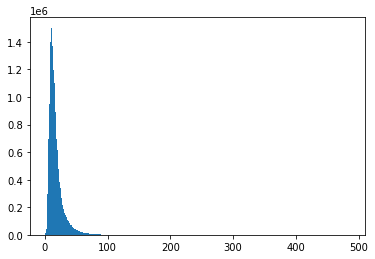

In [515]:
# 문장 길이 히스토그램

# plt.hist(df_train['source_len'], bins=10)
plt.hist(df_train['tokenized_len'], bins=500)
plt.show()

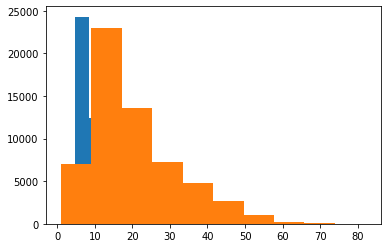

In [494]:
# 문장 길이 히스토그램

plt.hist(df_dev['source_len'], bins=10)
plt.hist(df_dev['tokenized_len'], bins=10)
plt.show()

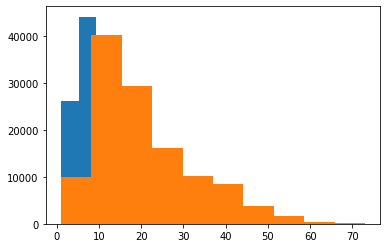

In [495]:
# 문장 길이 히스토그램

plt.hist(df_test['source_len'], bins=10)
plt.hist(df_test['tokenized_len'], bins=10)
plt.show()

In [496]:
# 128 넘는 개수
df_list = [df_train, df_dev, df_test]
df_name_list = ['train', 'dev', 'test']
length_count(df_list, df_name_list)

train 10958
dev 0
test 0


In [567]:
# 토크나이저별 문장 길이
train_grouped = df_train.groupby(['tokenizer'])
dev_grouped = df_dev.groupby(['tokenizer'])
test_grouped = df_test.groupby(['tokenizer'])

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

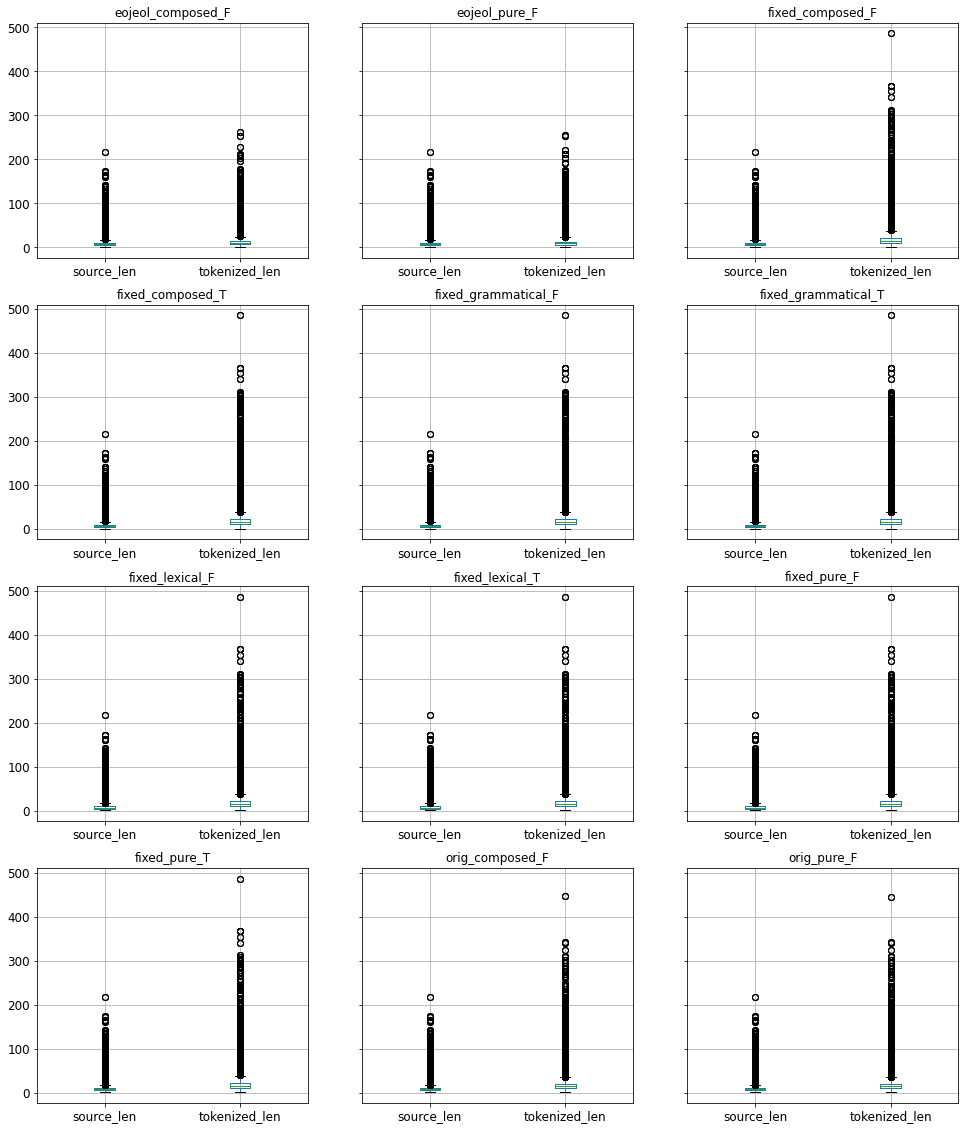

In [498]:
train_grouped.boxplot(fontsize=12, figsize=(16, 20))

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

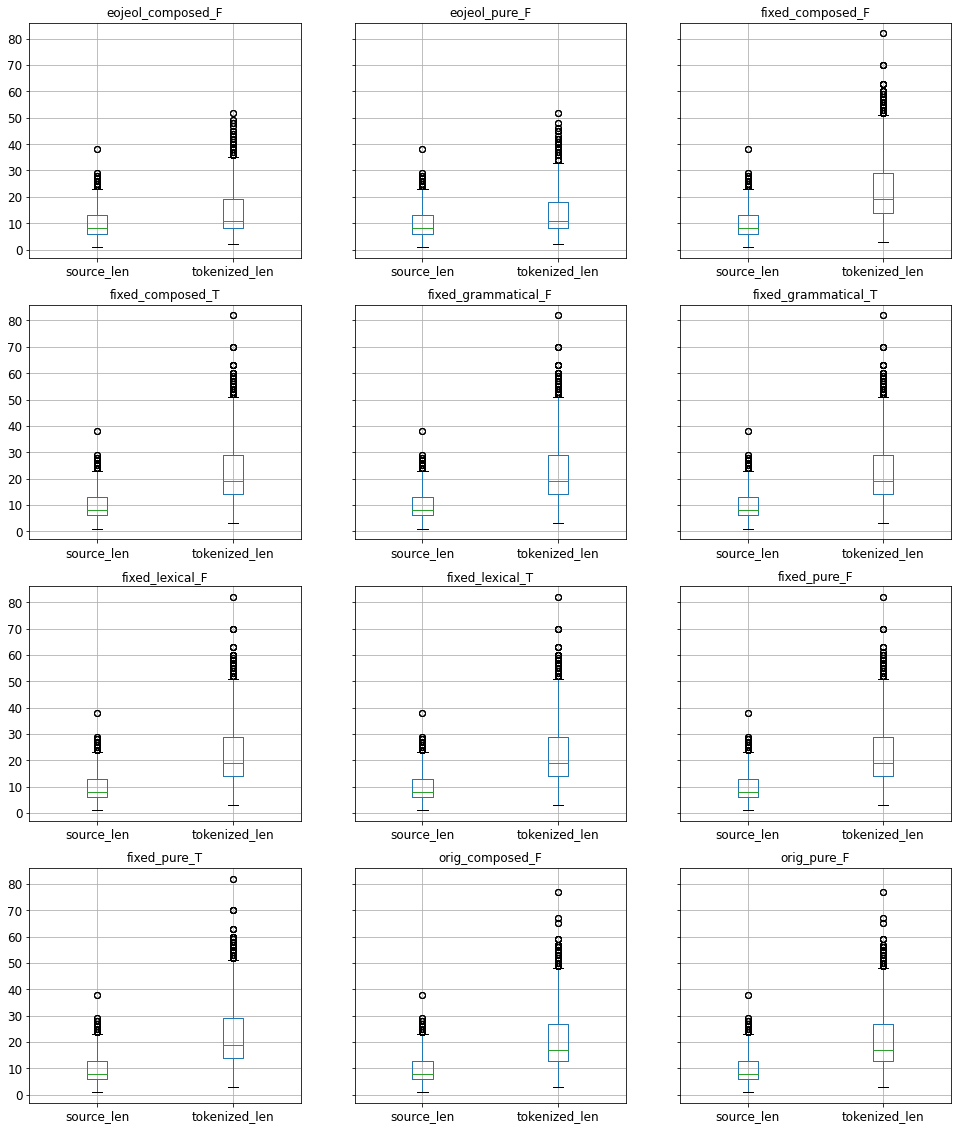

In [499]:
dev_grouped.boxplot(fontsize=12, figsize=(16, 20))

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

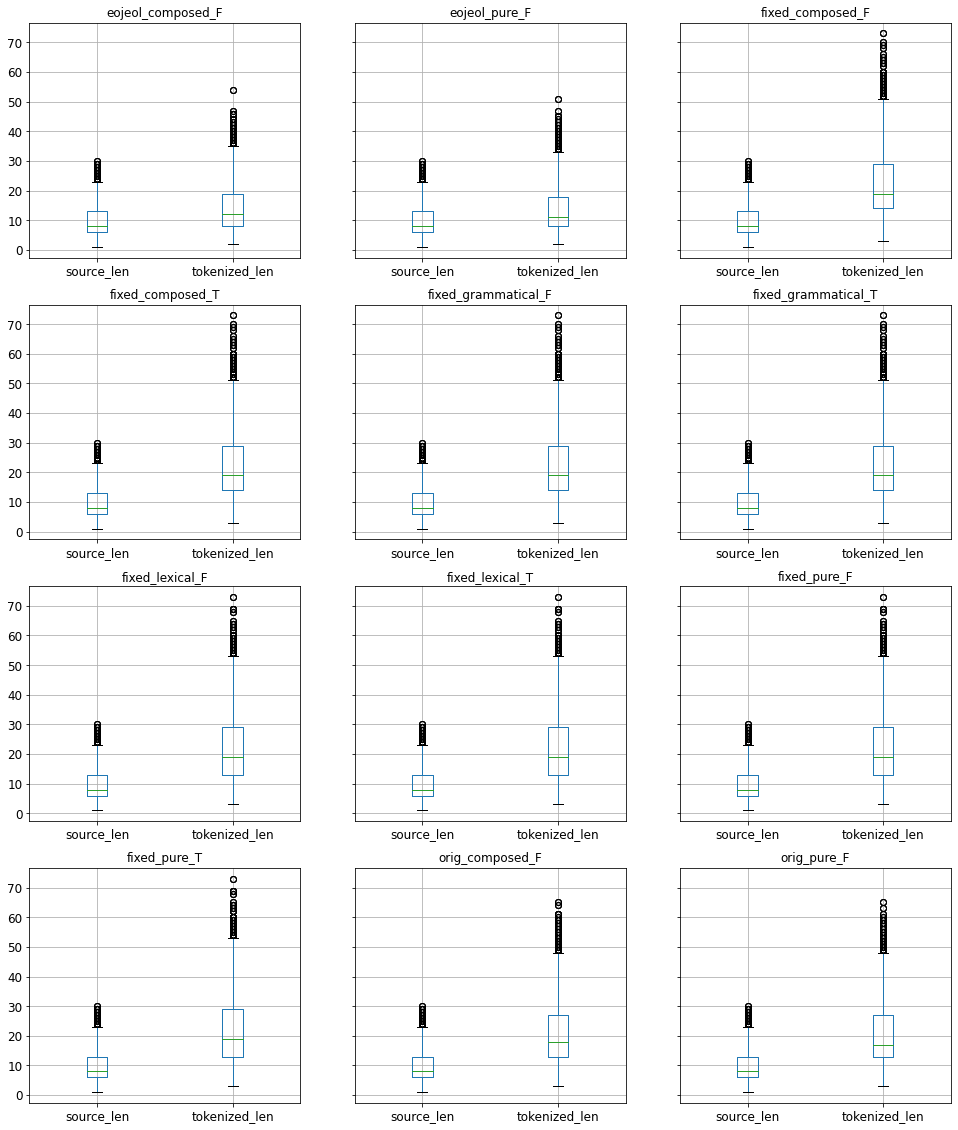

In [500]:
test_grouped.boxplot(fontsize=12, figsize=(16, 20))

In [501]:
train_grouped.describe()

source_len                                           \
                         count      mean       std  min  25%  50%   75%   
tokenizer                                                                 
eojeol_composed_F    1885383.0  8.587301  5.826794  1.0  5.0  7.0  10.0   
eojeol_pure_F        1885383.0  8.587301  5.826794  1.0  5.0  7.0  10.0   
fixed_composed_F     1885383.0  8.587301  5.826794  1.0  5.0  7.0  10.0   
fixed_composed_T     1885383.0  8.587301  5.826794  1.0  5.0  7.0  10.0   
fixed_grammatical_F  1885383.0  8.587301  5.826794  1.0  5.0  7.0  10.0   
fixed_grammatical_T  1885383.0  8.587301  5.826794  1.0  5.0  7.0  10.0   
fixed_lexical_F      1885383.0  8.587301  5.826794  1.0  5.0  7.0  10.0   
fixed_lexical_T      1885383.0  8.587301  5.826794  1.0  5.0  7.0  10.0   
fixed_pure_F         1885383.0  8.587301  5.826794  1.0  5.0  7.0  10.0   
fixed_pure_T         1885383.0  8.587301  5.826794  1.0  5.0  7.0  10.0   
orig_composed_F      1885383.0  8.587301  5.826794  1.0  5.0  7.0  10.0   
orig_pure_F          1885383.0  8.587301  5.826794  1.0  5.0  7.0  10.0   

                           tokenized_len                                   \
                       max         count       mean        std  min   25%   
tokenizer                                                                   
eojeol_composed_F    217.0     1885383.0  11.690135   8.413236  1.0   7.0   
eojeol_pure_F        217.0     1885383.0  11.340919   8.161745  1.0   6.0   
fixed_composed_F     217.0     1885383.0  18.520273  12.584464  1.0  11.0   
fixed_composed_T     217.0     1885383.0  18.524965  12.586292  1.0  11.0   
fixed_grammatical_F  217.0     1885383.0  18.525466  12.586648  1.0  11.0   
fixed_grammatical_T  217.0     1885383.0  18.525719  12.586999  1.0  11.0   
fixed_lexical_F      217.0     1885383.0  18.453779  12.536655  1.0  11.0   
fixed_lexical_T      217.0     1885383.0  18.455207  12.537975  1.0  11.0   
fixed_pure_F         217.0     1885383.0  18.449168  12.535236  1.0  11.0   
fixed_pure_T         217.0     1885383.0  18.451008  12.534975  1.0  11.0   
orig_composed_F      217.0     1885383.0  17.387921  11.680853  1.0  10.0   
orig_pure_F          217.0     1885383.0  17.302649  11.622147  1.0  10.0   

                                        
                      50%   75%    max  
tokenizer                               
eojeol_composed_F     9.0  14.0  262.0  
eojeol_pure_F         9.0  13.0  255.0  
fixed_composed_F     15.0  22.0  486.0  
fixed_composed_T     15.0  22.0  486.0  
fixed_grammatical_F  15.0  22.0  486.0  
fixed_grammatical_T  15.0  22.0  486.0  
fixed_lexical_F      15.0  22.0  485.0  
fixed_lexical_T      15.0  22.0  485.0  
fixed_pure_F         15.0  22.0  485.0  
fixed_pure_T         15.0  22.0  485.0  
orig_composed_F      14.0  20.0  446.0  
orig_pure_F          14.0  20.0  445.0

In [572]:
# def filter_by_len(x):
#     return x['tokenized_len'] > 128
cond = df_train['tokenized_len'] > 128


train_grouped.get_group('fixed_composed_F')[cond].count()



df_train[cond].to_csv('kornli_more_then_128_fixed_composed_F.tsv', sep='\t')

/tmp/ipykernel_25336/2389903448.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_composed_F')[cond].count()


In [541]:
train_grouped.get_group('fixed_composed_T')[cond].count()

/tmp/ipykernel_25336/1297008893.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_composed_T')[cond].count()


source             1141
tokenizer          1141
tokenize_result    1141
source_len         1141
tokenized_len      1141
dtype: int64

In [544]:
train_grouped.get_group('fixed_grammatical_T')[cond].count()

/tmp/ipykernel_25336/1976655224.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_grammatical_T')[cond].count()


source             1141
tokenizer          1141
tokenize_result    1141
source_len         1141
tokenized_len      1141
dtype: int64

In [545]:
train_grouped.get_group('fixed_grammatical_F')[cond].count()

/tmp/ipykernel_25336/1133772654.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_grammatical_F')[cond].count()


source             1141
tokenizer          1141
tokenize_result    1141
source_len         1141
tokenized_len      1141
dtype: int64

In [546]:
train_grouped.get_group('fixed_lexical_T')[cond].count()

/tmp/ipykernel_25336/3620636079.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_lexical_T')[cond].count()


source             1122
tokenizer          1122
tokenize_result    1122
source_len         1122
tokenized_len      1122
dtype: int64

In [547]:
train_grouped.get_group('fixed_lexical_F')[cond].count()

/tmp/ipykernel_25336/3606793827.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_lexical_F')[cond].count()


source             1122
tokenizer          1122
tokenize_result    1122
source_len         1122
tokenized_len      1122
dtype: int64

In [548]:
train_grouped.get_group('fixed_pure_T')[cond].count()

/tmp/ipykernel_25336/335682275.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_pure_T')[cond].count()


source             1122
tokenizer          1122
tokenize_result    1122
source_len         1122
tokenized_len      1122
dtype: int64

In [549]:
train_grouped.get_group('fixed_pure_F')[cond].count()

/tmp/ipykernel_25336/628209145.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_pure_F')[cond].count()


source             1125
tokenizer          1125
tokenize_result    1125
source_len         1125
tokenized_len      1125
dtype: int64

In [550]:
train_grouped.get_group('orig_composed_F')[cond].count()

/tmp/ipykernel_25336/4178865022.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('orig_composed_F')[cond].count()


source             853
tokenizer          853
tokenize_result    853
source_len         853
tokenized_len      853
dtype: int64

In [551]:
train_grouped.get_group('orig_pure_F')[cond].count()

/tmp/ipykernel_25336/3672549303.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('orig_pure_F')[cond].count()


source             831
tokenizer          831
tokenize_result    831
source_len         831
tokenized_len      831
dtype: int64

In [502]:
dev_grouped.describe()

source_len                                                 \
                         count      mean       std  min  25%  50%   75%   max   
tokenizer                                                                       
eojeol_composed_F       4977.0  9.902351  5.459743  1.0  6.0  8.0  13.0  38.0   
eojeol_pure_F           4977.0  9.902351  5.459743  1.0  6.0  8.0  13.0  38.0   
fixed_composed_F        4977.0  9.902351  5.459743  1.0  6.0  8.0  13.0  38.0   
fixed_composed_T        4977.0  9.902351  5.459743  1.0  6.0  8.0  13.0  38.0   
fixed_grammatical_F     4977.0  9.902351  5.459743  1.0  6.0  8.0  13.0  38.0   
fixed_grammatical_T     4977.0  9.902351  5.459743  1.0  6.0  8.0  13.0  38.0   
fixed_lexical_F         4977.0  9.902351  5.459743  1.0  6.0  8.0  13.0  38.0   
fixed_lexical_T         4977.0  9.902351  5.459743  1.0  6.0  8.0  13.0  38.0   
fixed_pure_F            4977.0  9.902351  5.459743  1.0  6.0  8.0  13.0  38.0   
fixed_pure_T            4977.0  9.902351  5.459743  1.0  6.0  8.0  13.0  38.0   
orig_composed_F         4977.0  9.902351  5.459743  1.0  6.0  8.0  13.0  38.0   
orig_pure_F             4977.0  9.902351  5.459743  1.0  6.0  8.0  13.0  38.0   

                    tokenized_len                                         \
                            count       mean        std  min   25%   50%   
tokenizer                                                                  
eojeol_composed_F          4977.0  14.169379   8.321685  2.0   8.0  11.0   
eojeol_pure_F              4977.0  13.722925   8.052118  2.0   8.0  11.0   
fixed_composed_F           4977.0  22.343380  11.764710  3.0  14.0  19.0   
fixed_composed_T           4977.0  22.345389  11.766581  3.0  14.0  19.0   
fixed_grammatical_F        4977.0  22.345389  11.766581  3.0  14.0  19.0   
fixed_grammatical_T        4977.0  22.345389  11.766581  3.0  14.0  19.0   
fixed_lexical_F            4977.0  22.276673  11.725663  3.0  14.0  19.0   
fixed_lexical_T            4977.0  22.278682  11.728802  3.0  14.0  19.0   
fixed_pure_F               4977.0  22.274262  11.725119  3.0  14.0  19.0   
fixed_pure_T               4977.0  22.275869  11.725476  3.0  14.0  19.0   
orig_composed_F            4977.0  20.691581  10.910569  3.0  13.0  17.0   
orig_pure_F                4977.0  20.609805  10.869219  3.0  13.0  17.0   

                                 
                      75%   max  
tokenizer                        
eojeol_composed_F    19.0  52.0  
eojeol_pure_F        18.0  52.0  
fixed_composed_F     29.0  82.0  
fixed_composed_T     29.0  82.0  
fixed_grammatical_F  29.0  82.0  
fixed_grammatical_T  29.0  82.0  
fixed_lexical_F      29.0  82.0  
fixed_lexical_T      29.0  82.0  
fixed_pure_F         29.0  82.0  
fixed_pure_T         29.0  82.0  
orig_composed_F      27.0  77.0  
orig_pure_F          27.0  77.0

In [503]:
test_grouped.describe()

source_len                                                 \
                         count      mean       std  min  25%  50%   75%   max   
tokenizer                                                                       
eojeol_composed_F      10017.0  9.927224  5.467629  1.0  6.0  8.0  13.0  30.0   
eojeol_pure_F          10017.0  9.927224  5.467629  1.0  6.0  8.0  13.0  30.0   
fixed_composed_F       10017.0  9.927224  5.467629  1.0  6.0  8.0  13.0  30.0   
fixed_composed_T       10017.0  9.927224  5.467629  1.0  6.0  8.0  13.0  30.0   
fixed_grammatical_F    10017.0  9.927224  5.467629  1.0  6.0  8.0  13.0  30.0   
fixed_grammatical_T    10017.0  9.927224  5.467629  1.0  6.0  8.0  13.0  30.0   
fixed_lexical_F        10017.0  9.927224  5.467629  1.0  6.0  8.0  13.0  30.0   
fixed_lexical_T        10017.0  9.927224  5.467629  1.0  6.0  8.0  13.0  30.0   
fixed_pure_F           10017.0  9.927224  5.467629  1.0  6.0  8.0  13.0  30.0   
fixed_pure_T           10017.0  9.927224  5.467629  1.0  6.0  8.0  13.0  30.0   
orig_composed_F        10017.0  9.927224  5.467629  1.0  6.0  8.0  13.0  30.0   
orig_pure_F            10017.0  9.927224  5.467629  1.0  6.0  8.0  13.0  30.0   

                    tokenized_len                                         \
                            count       mean        std  min   25%   50%   
tokenizer                                                                  
eojeol_composed_F         10017.0  14.300888   8.311761  2.0   8.0  12.0   
eojeol_pure_F             10017.0  13.850754   8.038756  2.0   8.0  11.0   
fixed_composed_F          10017.0  22.498552  11.921143  3.0  14.0  19.0   
fixed_composed_T          10017.0  22.502745  11.923537  3.0  14.0  19.0   
fixed_grammatical_F       10017.0  22.502646  11.923336  3.0  14.0  19.0   
fixed_grammatical_T       10017.0  22.503145  11.923412  3.0  14.0  19.0   
fixed_lexical_F           10017.0  22.416093  11.864861  3.0  13.0  19.0   
fixed_lexical_T           10017.0  22.418089  11.866163  3.0  13.0  19.0   
fixed_pure_F              10017.0  22.414895  11.865374  3.0  13.0  19.0   
fixed_pure_T              10017.0  22.414396  11.863040  3.0  13.0  19.0   
orig_composed_F           10017.0  20.815014  11.016716  3.0  13.0  18.0   
orig_pure_F               10017.0  20.718279  10.953809  3.0  13.0  17.0   

                                 
                      75%   max  
tokenizer                        
eojeol_composed_F    19.0  54.0  
eojeol_pure_F        18.0  51.0  
fixed_composed_F     29.0  73.0  
fixed_composed_T     29.0  73.0  
fixed_grammatical_F  29.0  73.0  
fixed_grammatical_T  29.0  73.0  
fixed_lexical_F      29.0  73.0  
fixed_lexical_T      29.0  73.0  
fixed_pure_F         29.0  73.0  
fixed_pure_T         29.0  73.0  
orig_composed_F      27.0  65.0  
orig_pure_F          27.0  65.0

In [516]:
# 길이가 128 넘는 예시
more_then_128 = df_train[df_train['tokenized_len'] > 128]

In [466]:
more_then_128.sort_values(by='tokenized_len', ascending=False)

,source,tokenizer,tokenize_result,source_len,tokenized_len
4089652,"글쎄요, 그건 분명합니다. 그들은 심지어 지금 어디로 가져 가고 있다는 것을 의미합...",fixed_composed_F,"글쎄 ##요 , 그거 ᆫ 분명 하 ᄇ니다 . 그 들 은 심지어 지금 어디 로 가지 ...",217,486
7397212,"글쎄요, 그건 분명합니다. 그들은 심지어 지금 어디로 가져 가고 있다는 것을 의미합...",fixed_composed_F,"글쎄 ##요 , 그거 ᆫ 분명 하 ᄇ니다 . 그 들 은 심지어 지금 어디 로 가지 ...",217,486
7397218,"글쎄요, 그건 분명합니다. 그들은 심지어 지금 어디로 가져 가고 있다는 것을 의미합...",fixed_grammatical_T,"글쎄 ##요 , 그거 ⫸ᆫ 분명 하 ⭧ᄇ니다 . 그 들 ⫸은 심지어 지금 어...",217,486
5326804,"글쎄요, 그건 분명합니다. 그들은 심지어 지금 어디로 가져 가고 있다는 것을 의미합...",fixed_composed_F,"글쎄 ##요 , 그거 ᆫ 분명 하 ᄇ니다 . 그 들 은 심지어 지금 어디 로 가지 ...",217,486
4089658,"글쎄요, 그건 분명합니다. 그들은 심지어 지금 어디로 가져 가고 있다는 것을 의미합...",fixed_grammatical_T,"글쎄 ##요 , 그거 ⫸ᆫ 분명 하 ⭧ᄇ니다 . 그 들 ⫸은 심지어 지금 어...",217,486
...,...,...,...,...,...
4687642,"그래서 거기 바람 한기를 못 쐬는 거야. 어, 내 목표는 내가 더 이상 겨울에 대해...",fixed_grammatical_T,"그래서 거기 바람 한기 ⫸를 못 쐬 ⭧는 거 이 ⭧야 . 어 , 나 ⫸의...",61,129
4687641,"그래서 거기 바람 한기를 못 쐬는 거야. 어, 내 목표는 내가 더 이상 겨울에 대해...",fixed_pure_T,그래서 거기 바람 한기 ⫸를 못 쐬 ⭧는 거 이...,61,129
4687640,"그래서 거기 바람 한기를 못 쐬는 거야. 어, 내 목표는 내가 더 이상 겨울에 대해...",fixed_composed_T,"그래서 거기 바람 한기 ⫸를 못 쐬 ⭧는 거 이 ⭧야 . 어 , 나 ⫸의 목표 ⫸는...",61,129
4687639,"그래서 거기 바람 한기를 못 쐬는 거야. 어, 내 목표는 내가 더 이상 겨울에 대해...",fixed_lexical_F,그래서 거기 바람 한기 를 못 쐬 는 거 이 야 . ᄋ...,61,129


array([[<AxesSubplot:title={'center':'source_len'}>,
        <AxesSubplot:title={'center':'tokenized_len'}>]], dtype=object)

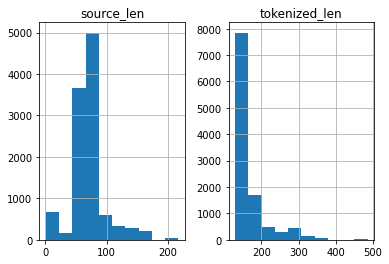

In [517]:
more_then_128.hist()

In [504]:
# 길이가 144 넘는 예시
more_then_144 = df_train[df_train['tokenized_len'] > 144]

In [506]:
more_then_144 # 5969개

,source,tokenizer,tokenize_result,source_len,tokenized_len
2044,나는 이 멀티비스타 같은 것에 관심이 없다. 왜냐하면 쿠차라 위 어딘가의 아름다운 ...,fixed_composed_F,나 는 이 멀티 비스타 같 은 것 에 관심 이 없 다 . 왜냐하면 쿠 차 라 위 어...,65,157
2045,나는 이 멀티비스타 같은 것에 관심이 없다. 왜냐하면 쿠차라 위 어딘가의 아름다운 ...,fixed_pure_F,나 는 이 멀티 비스타 같 은 것 에 관심 ᄋ...,65,156
2046,나는 이 멀티비스타 같은 것에 관심이 없다. 왜냐하면 쿠차라 위 어딘가의 아름다운 ...,fixed_grammatical_F,나 는 이 멀티 비스타 같 은 것 에 관심 이 없 다 . 왜냐하면 쿠 ...,65,157
2047,나는 이 멀티비스타 같은 것에 관심이 없다. 왜냐하면 쿠차라 위 어딘가의 아름다운 ...,fixed_lexical_F,나 는 이 멀티 비스타 같 은 것 에 관심 이 없 ...,65,157
2048,나는 이 멀티비스타 같은 것에 관심이 없다. 왜냐하면 쿠차라 위 어딘가의 아름다운 ...,fixed_composed_T,나 ⫸는 이 멀티 비스타 같 ⭧은 것 ⫸에 관심 ⫸이 없 ⭧다 . 왜냐하면 쿠 차 ...,65,157
...,...,...,...,...,...
9385975,"예를 들어, 이 연구의 목적이 예시적이라면, 현장 선정을 위한 적절한 근거가 전형적...",fixed_lexical_F,"예 를 들 어 , 이 연구 의 목적 이 예시 적 이 라...",63,150
9385976,"예를 들어, 이 연구의 목적이 예시적이라면, 현장 선정을 위한 적절한 근거가 전형적...",fixed_composed_T,"예 ⫸를 들 ⭧어 , 이 연구 ⫸의 목적 ⫸이 예시 적 이 ⭧라면 , 현장 선정 ⫸...",63,150
9385977,"예를 들어, 이 연구의 목적이 예시적이라면, 현장 선정을 위한 적절한 근거가 전형적...",fixed_pure_T,"예 ⫸를 들 ⭧어 , 이 연구 ⫸의 목적 ⫸이 예시...",63,150
9385978,"예를 들어, 이 연구의 목적이 예시적이라면, 현장 선정을 위한 적절한 근거가 전형적...",fixed_grammatical_T,"예 ⫸를 들 ⭧어 , 이 연구 ⫸의 목적 ⫸이 예시 적 이 ⭧라면 ,...",63,150


In [507]:
# 160 초과
more_then_160 = df_train[df_train['tokenized_len'] > 160]
more_then_160 # 3516개

,source,tokenizer,tokenize_result,source_len,tokenized_len
8570,나는 지방선거에서 사람들이 더 큰 선거에서 투표한다고 생각한다. 왜냐하면 나는 사람...,orig_composed_F,나 는 지방 선거 에서 사람 들 이 더 큰 선거 에서 투표 한다고 생각 한다 . 왜...,85,176
8571,나는 지방선거에서 사람들이 더 큰 선거에서 투표한다고 생각한다. 왜냐하면 나는 사람...,orig_pure_F,나 는 지방 선거 에서 사람 들 이 더 큰 서...,85,176
8572,나는 지방선거에서 사람들이 더 큰 선거에서 투표한다고 생각한다. 왜냐하면 나는 사람...,fixed_composed_F,나 는 지방 선거 에서 사람 들 이 더 크 ᆫ 선거 에서 투표 하 ᆫ다고 생각 하 ...,85,189
8573,나는 지방선거에서 사람들이 더 큰 선거에서 투표한다고 생각한다. 왜냐하면 나는 사람...,fixed_pure_F,나 는 지방 선거 에서 사람 들 이 더 크 ᆫ ᄉ...,85,189
8574,나는 지방선거에서 사람들이 더 큰 선거에서 투표한다고 생각한다. 왜냐하면 나는 사람...,fixed_grammatical_F,나 는 지방 선거 에서 사람 들 이 더 크 ᆫ 선거 에서 투표 하 ᆫᄃ...,85,189
...,...,...,...,...,...
9341839,"정말 멋진 것이 필요하지 않은 경우에도 괜찮습니다. 다른 1,500 달러가 필요하지...",fixed_lexical_F,정말 멋지 ᆫ 것 이 필요 하 지 않 은 경우 에 ...,164,308
9341840,"정말 멋진 것이 필요하지 않은 경우에도 괜찮습니다. 다른 1,500 달러가 필요하지...",fixed_composed_T,정말 멋지 ⭧ᆫ 것 ⫸이 필요 하 ⭧지 않 ⭧은 경우 ⫸에 ⫸도 괜찮 ⭧습니다 . ...,164,308
9341841,"정말 멋진 것이 필요하지 않은 경우에도 괜찮습니다. 다른 1,500 달러가 필요하지...",fixed_pure_T,정말 멋지 ⭧ᆫ 것 ⫸이 필요 하 ⭧지 않 ⭧은 ...,164,308
9341842,"정말 멋진 것이 필요하지 않은 경우에도 괜찮습니다. 다른 1,500 달러가 필요하지...",fixed_grammatical_T,정말 멋지 ⭧ᆫ 것 ⫸이 필요 하 ⭧지 않 ⭧은 경우 ⫸에 ⫸도 괜찮 ⭧...,164,308


## hsd

In [215]:
# from quickspacer import Spacer
# spacer = Spacer()

def load_data(file_path: str) -> Tuple[List[str], List[int]]:
    """
    file_path에 존재하는 tsv를 읽어서 bert_data.InputIds 형태로 변경해주는 함수입니다.
    각각의 row를 bert input으로 바꾸어주기 위한 함수입니다.
    각 row는 아래처럼 구성되어야 합니다.
    1. sentence_a
    2. sentence_b
    3. label
    """
    sentence = []
    # sentence_bs = []
    labels = []

    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f.readlines()[1:]):
            splitted = line.strip().split("\t")
            if len(splitted) != 4:
                #print(f"[ERROR] {repr(line)}, line {i}")
                continue
            # # 띄어쓰기
            if spacing:
                # comment
                splitted[1] = spacer.space([splitted[1]])[0]
                sentence.append(splitted[0])
                # sentence_bs.append(splitted[1])
            else:
                sentence.append(splitted[0])
                # sentence_bs.append(splitted[1])
            # sentence_as.append(splitted[0])
            # sentence_bs.append(splitted[1])

#             labels.append(label_to_index[splitted[3]])

    return sentence

In [216]:
task = 'hsd'
train = load_data('../dataset/nlu_tasks/hsd/train.tsv')
dev = load_data('../dataset/nlu_tasks/hsd/dev.tsv')

corpus_list = [train, dev]
corpus_name_list = ['train', 'dev']

In [218]:
analysis(task, corpus_list, corpus_name_list, sent2=False)

In [219]:
# 길이 재기
df_train = pd.read_csv('hsd_train.csv', delimiter='\t')
df_dev = pd.read_csv('hsd_dev.csv', delimiter='\t')

# 길이 칼럼 추가
df_train['source_len'] = df_train['source'].apply(lambda x: len(str(x).split()))
df_train['tokenized_len'] = df_train['tokenize_result'].apply(lambda x: len(str(x).split()))

df_dev['source_len'] = df_dev['source'].apply(lambda x: len(str(x).split()))
df_dev['tokenized_len'] = df_dev['tokenize_result'].apply(lambda x: len(str(x).split()))

In [220]:
# 기초 통계
df_train.describe()

,source_len,tokenized_len
count,94752.000000,94752.000000
mean,8.399316,22.196239
std,6.078274,15.516436
min,2.000000,1.000000
25%,4.000000,10.000000
50%,6.000000,18.000000
75%,11.000000,30.000000
max,39.000000,87.000000


In [221]:
# 기초 통계
df_dev.describe()

,source_len,tokenized_len
count,5652.000000,5652.000000
mean,8.518047,22.231776
std,6.322025,15.092321
min,2.000000,2.000000
25%,4.000000,11.000000
50%,7.000000,17.000000
75%,11.000000,32.000000
max,39.000000,82.000000


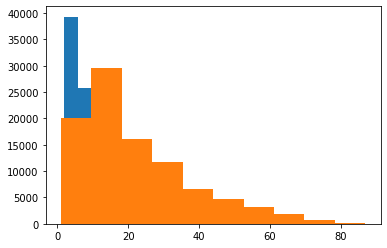

In [222]:
# 문장 길이 히스토그램

plt.hist(df_train['source_len'], bins=10)
plt.hist(df_train['tokenized_len'], bins=10)
plt.show()

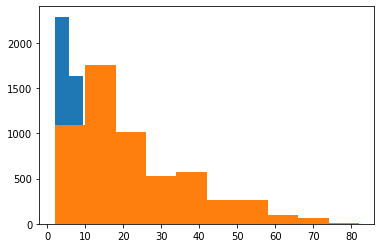

In [223]:
# 문장 길이 히스토그램

plt.hist(df_dev['source_len'], bins=10)
plt.hist(df_dev['tokenized_len'], bins=10)
plt.show()

In [224]:
# 128 넘는 개수
df_list = [df_train, df_dev]
df_name_list = ['train', 'dev']
length_count(df_list, df_name_list)

train 0
dev 0


In [225]:
# 토크나이저별 문장 길이
train_grouped = df_train.groupby(['tokenizer'])
dev_grouped = df_dev.groupby(['tokenizer'])
test_grouped = df_test.groupby(['tokenizer'])

In [ ]:
train_grouped.boxplot()

In [227]:
dev_grouped.boxplot()

<bound method boxplot_frame_groupby of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f199750dc40>>

In [228]:
test_grouped.boxplot

<bound method boxplot_frame_groupby of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f199750ddc0>>

## ynat

In [229]:
# json to tsv
ynat_train = pd.read_json('../KLUE-baseline/data/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json')
ynat_dev = pd.read_json('../KLUE-baseline/data/klue_benchmark/ynat-v1.1/ynat-v1.1_dev.json')

In [230]:
# 타이틀만 저장
ynat_train = ynat_train['title']
ynat_dev = ynat_dev['title']
ynat_train.to_csv('ynat_orig_train.tsv', index=False)
ynat_dev.to_csv('ynat_orig_dev.tsv', index=False)

In [231]:
def load_data(file_path: str) -> Tuple[List[str]]:
    """
    file_path에 존재하는 tsv를 읽어서 bert_data.InputIds 형태로 변경해주는 함수입니다.
    각각의 row를 bert input으로 바꾸어주기 위한 함수입니다.
    각 row는 아래처럼 구성되어야 합니다.
    1. sentence
    3. label
    """
    sentences: List[str] = []
    #labels: List[int] = []

    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f.readlines()):
            splitted = line.strip()
            # if len(splitted) != 2:
            #     #print(f"[ERROR] {repr(line)}, line {i}")
            #     continue
            sentences.append(splitted)
     #       labels.append(label_to_index[splitted[1]])
    # sentences = [re.sub(p_kakao, "", s) for s in sentences]
    
    return sentences

In [232]:
task = 'ynat'
train = load_data('ynat_orig_train.tsv')
dev = load_data('ynat_orig_dev.tsv')

corpus_list = [train, dev]
corpus_name_list = ['train', 'dev']

In [233]:
analysis(task, corpus_list, corpus_name_list, sent2=False)

In [234]:
# 길이 재기
df_train = pd.read_csv('ynat_train.csv', delimiter='\t')
df_dev = pd.read_csv('ynat_dev.csv', delimiter='\t')

# 길이 칼럼 추가
df_train['source_len'] = df_train['source'].apply(lambda x: len(str(x).split()))
df_train['tokenized_len'] = df_train['tokenize_result'].apply(lambda x: len(str(x).split()))

df_dev['source_len'] = df_dev['source'].apply(lambda x: len(str(x).split()))
df_dev['tokenized_len'] = df_dev['tokenize_result'].apply(lambda x: len(str(x).split()))

In [235]:
# 기초 통계
df_train.describe()

,source_len,tokenized_len
count,548148.000000,548148.000000
mean,6.611090,11.716553
std,1.460216,2.879356
min,1.000000,1.000000
25%,6.000000,10.000000
50%,7.000000,12.000000
75%,8.000000,14.000000
max,13.000000,25.000000


In [236]:
# 기초 통계
df_dev.describe()

,source_len,tokenized_len
count,109296.000000,109296.000000
mean,6.470246,11.905861
std,1.525480,3.048772
min,1.000000,1.000000
25%,6.000000,10.000000
50%,7.000000,12.000000
75%,7.000000,14.000000
max,12.000000,24.000000


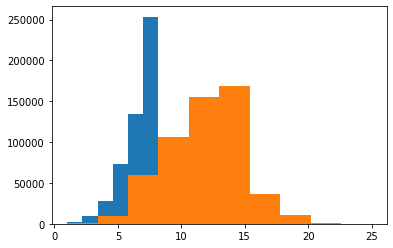

In [237]:
# 문장 길이 히스토그램

plt.hist(df_train['source_len'], bins=10)
plt.hist(df_train['tokenized_len'], bins=10)
plt.show()

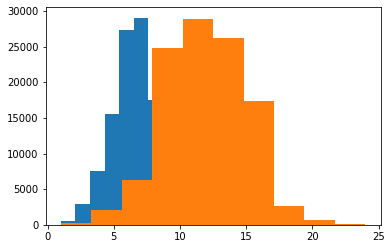

In [238]:
# 문장 길이 히스토그램

plt.hist(df_dev['source_len'], bins=10)
plt.hist(df_dev['tokenized_len'], bins=10)
plt.show()

In [239]:
# 128 넘는 개수
df_list = [df_train, df_dev]
df_name_list = ['train', 'dev']
length_count(df_list, df_name_list)

train 0
dev 0


In [240]:
# 토크나이저별 문장 길이
train_grouped = df_train.groupby(['tokenizer'])
dev_grouped = df_dev.groupby(['tokenizer'])
test_grouped = df_test.groupby(['tokenizer'])

In [254]:
train_grouped.describe()

source_len                                               \
                         count     mean       std  min  25%  50%  75%   max   
tokenizer                                                                     
eojeol_composed_F      45679.0  6.61109  1.460231  1.0  6.0  7.0  8.0  13.0   
eojeol_pure_F          45679.0  6.61109  1.460231  1.0  6.0  7.0  8.0  13.0   
fixed_composed_F       45679.0  6.61109  1.460231  1.0  6.0  7.0  8.0  13.0   
fixed_composed_T       45679.0  6.61109  1.460231  1.0  6.0  7.0  8.0  13.0   
fixed_grammatical_F    45679.0  6.61109  1.460231  1.0  6.0  7.0  8.0  13.0   
fixed_grammatical_T    45679.0  6.61109  1.460231  1.0  6.0  7.0  8.0  13.0   
fixed_lexical_F        45679.0  6.61109  1.460231  1.0  6.0  7.0  8.0  13.0   
fixed_lexical_T        45679.0  6.61109  1.460231  1.0  6.0  7.0  8.0  13.0   
fixed_pure_F           45679.0  6.61109  1.460231  1.0  6.0  7.0  8.0  13.0   
fixed_pure_T           45679.0  6.61109  1.460231  1.0  6.0  7.0  8.0  13.0   
orig_composed_F        45679.0  6.61109  1.460231  1.0  6.0  7.0  8.0  13.0   
orig_pure_F            45679.0  6.61109  1.460231  1.0  6.0  7.0  8.0  13.0   

                    tokenized_len                                              \
                            count       mean       std  min   25%   50%   75%   
tokenizer                                                                       
eojeol_composed_F         45679.0   9.815670  2.668827  1.0   8.0  10.0  12.0   
eojeol_pure_F             45679.0   9.558178  2.607894  1.0   8.0  10.0  11.0   
fixed_composed_F          45679.0  12.273211  2.792542  2.0  11.0  12.0  14.0   
fixed_composed_T          45679.0  12.279691  2.794173  2.0  11.0  12.0  14.0   
fixed_grammatical_F       45679.0  12.281814  2.794802  2.0  11.0  12.0  14.0   
fixed_grammatical_T       45679.0  12.283150  2.794930  2.0  11.0  12.0  14.0   
fixed_lexical_F           45679.0  12.135752  2.766633  1.0  10.0  12.0  14.0   
fixed_lexical_T           45679.0  12.145909  2.769723  1.0  10.0  12.0  14.0   
fixed_pure_F              45679.0  12.130191  2.765729  1.0  10.0  12.0  14.0   
fixed_pure_T              45679.0  12.133650  2.766989  1.0  10.0  12.0  14.0   
orig_composed_F           45679.0  11.855951  2.608679  2.0  10.0  12.0  14.0   
orig_pure_F               45679.0  11.705466  2.576350  2.0  10.0  12.0  13.0   

                           
                      max  
tokenizer                  
eojeol_composed_F    24.0  
eojeol_pure_F        24.0  
fixed_composed_F     25.0  
fixed_composed_T     25.0  
fixed_grammatical_F  25.0  
fixed_grammatical_T  25.0  
fixed_lexical_F      25.0  
fixed_lexical_T      25.0  
fixed_pure_F         25.0  
fixed_pure_T         25.0  
orig_composed_F      24.0  
orig_pure_F          23.0

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

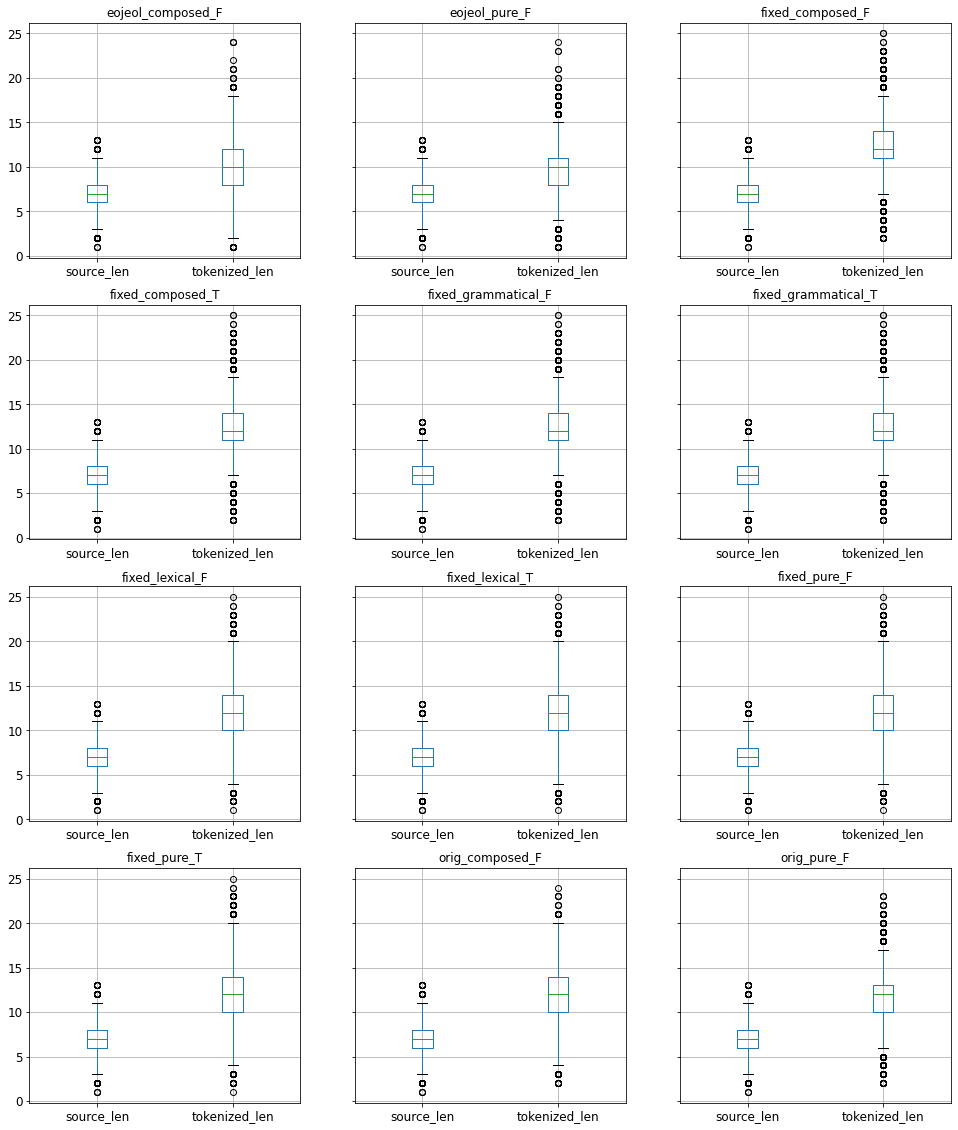

In [250]:
train_grouped.boxplot(fontsize=12, figsize=(16, 20))

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

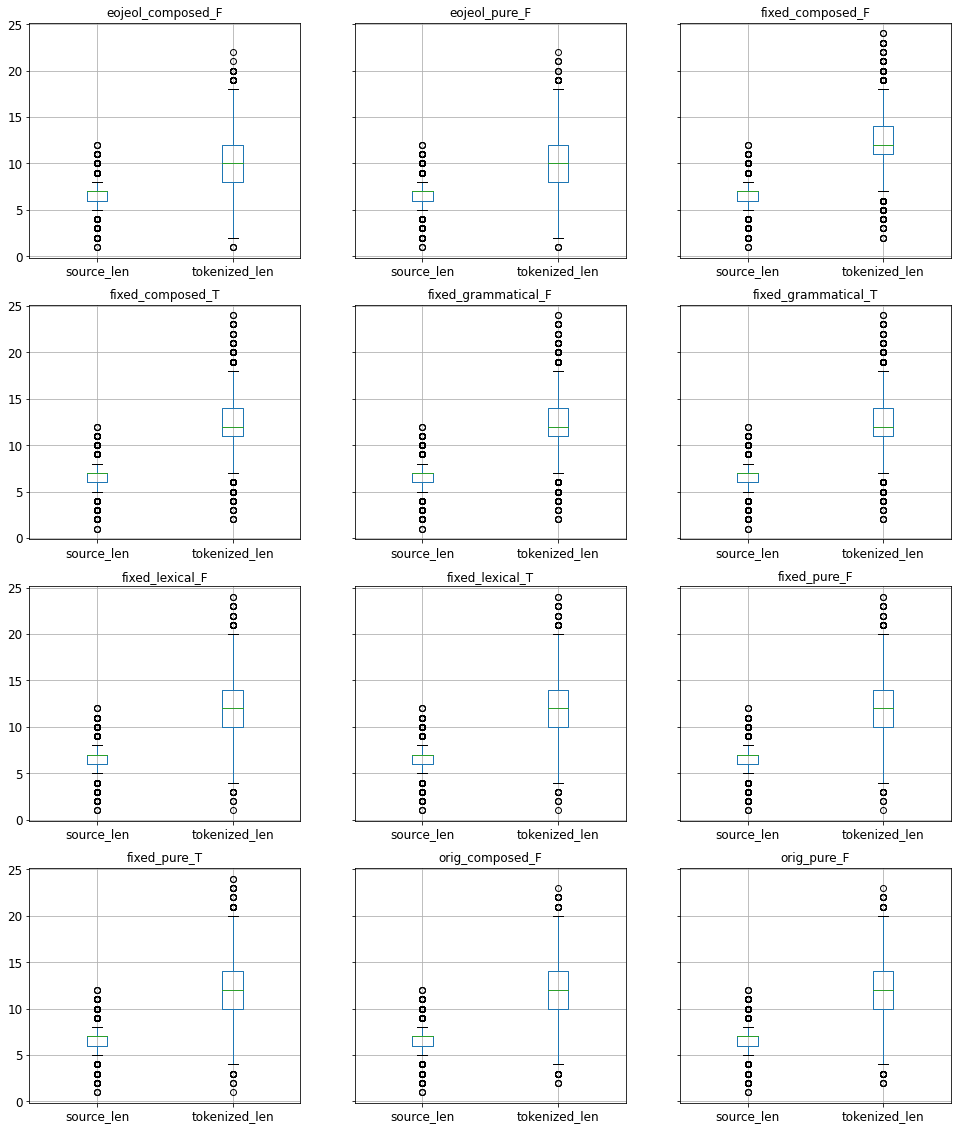

In [251]:
dev_grouped.boxplot(fontsize=12, figsize=(16, 20))

## klue_sts

In [72]:
# json to tsv
sts_train = pd.read_json('../KLUE-baseline/data/klue_benchmark/klue-sts-v1.1/klue-sts-v1.1_train.json')
sts_dev = pd.read_json('../KLUE-baseline/data/klue_benchmark/klue-sts-v1.1/klue-sts-v1.1_dev.json')

In [73]:
sts_train

,guid,source,sentence1,sentence2,labels,annotations
0,klue-sts-v1_train_00000,airbnb-rtt,숙소 위치는 찾기 쉽고 일반적인 한국의 반지하 숙소입니다.,숙박시설의 위치는 쉽게 찾을 수 있고 한국의 대표적인 반지하 숙박시설입니다.,"{'label': 3.7, 'real-label': 3.714285714285714...","{'agreement': '0:0:0:2:5:0', 'annotators': ['0..."
1,klue-sts-v1_train_00001,policy-sampled,위반행위 조사 등을 거부·방해·기피한 자는 500만원 이하 과태료 부과 대상이다.,시민들 스스로 자발적인 예방 노력을 한 것은 아산 뿐만이 아니었다.,"{'label': 0.0, 'real-label': 0.0, 'binary-labe...","{'agreement': '5:0:0:0:0:0', 'annotators': ['1..."
2,klue-sts-v1_train_00002,paraKQC-sampled,회사가 보낸 메일은 이 지메일이 아니라 다른 지메일 계정으로 전달해줘.,사람들이 주로 네이버 메일을 쓰는 이유를 알려줘,"{'label': 0.30000000000000004, 'real-label': 0...","{'agreement': '4:2:0:0:0:0', 'annotators': ['1..."
3,klue-sts-v1_train_00003,policy-sampled,"긴급 고용안정지원금은 지역고용대응 등 특별지원금, 지자체별 소상공인 지원사업, 취업...","고용보험이 1차 고용안전망이라면, 국민취업지원제도는 2차 고용안전망입니다.","{'label': 0.6000000000000001, 'real-label': 0....","{'agreement': '4:2:1:0:0:0', 'annotators': ['1..."
4,klue-sts-v1_train_00004,airbnb-rtt,"호스트의 답장이 늦으나, 개선될 것으로 보입니다.",호스트 응답이 늦었지만 개선될 것으로 보입니다.,"{'label': 4.7, 'real-label': 4.714285714285714...","{'agreement': '0:0:0:0:2:5', 'annotators': ['1..."
...,...,...,...,...,...,...
11663,klue-sts-v1_train_11663,airbnb-rtt,일단 방은 사진이랑 똑같고 매우 깨끗합니다.,"우선, 방은 그림과 같고 매우 깨끗합니다.","{'label': 4.0, 'real-label': 4.0, 'binary-labe...","{'agreement': '0:0:0:2:2:2', 'annotators': ['1..."
11664,klue-sts-v1_train_11664,paraKQC-sampled,생일이 삼월이라는 친구 이름이 뭐야?,"운동하러 갈 시간은 밥 먹기 전이 좋아, 먹은 후가 좋아?","{'label': 0.0, 'real-label': 0.0, 'binary-labe...","{'agreement': '7:0:0:0:0:0', 'annotators': ['0..."
11665,klue-sts-v1_train_11665,airbnb-rtt,그녀는 지속적으로 나에게 그녀가 만든 새로운 규칙을 매일 매일 이메일로 보냈다.,그녀는 자신이 만든 새로운 규칙을 매일 끊임없이 제게 이메일로 보냈습니다.,"{'label': 3.7, 'real-label': 3.666666666666667...","{'agreement': '0:0:0:3:2:1', 'annotators': ['1..."
11666,klue-sts-v1_train_11666,airbnb-rtt,개 1마리 고양이 3마리 너무 귀여워요!,개 한 마리와 고양이 세 마리는 정말 귀여워요!,"{'label': 4.7, 'real-label': 4.714285714285714...","{'agreement': '0:0:0:0:2:5', 'annotators': ['1..."


In [74]:
#tsv로 저장
sts_train[['sentence1', 'sentence2']].to_csv('klue-sts_orig_train.tsv', index=False)
sts_dev[['sentence1', 'sentence2']].to_csv('klue-sts_orig_dev.tsv', index=False)

In [75]:
def load_data(file_path: str) -> Tuple[List[str], List[str]]:
    """
    file_path에 존재하는 tsv를 읽어서 bert_data.InputIds 형태로 변경해주는 함수입니다.
    각각의 row를 bert input으로 바꾸어주기 위한 함수입니다.
    각 row는 아래처럼 구성되어야 합니다.
    1. sentence_a
    2. sentence_b
    3. label
    """
    sentence_as = []
    sentence_bs = []
    # labels = []

    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f.readlines()[1:]):
            splitted = line.strip().split(',')
            sentence_as.append(splitted[0])
            sentence_bs.append(splitted[1])
            # labels.append(label_to_index[splitted[2]])

    return sentence_as, sentence_bs

In [76]:
task = 'klue-sts'
train = load_data('klue-sts_orig_train.tsv')
dev = load_data('klue-sts_orig_dev.tsv')

corpus_list = [train, dev]
corpus_name_list = ['train', 'dev']

In [77]:
train

(['숙소 위치는 찾기 쉽고 일반적인 한국의 반지하 숙소입니다.',
  '위반행위 조사 등을 거부·방해·기피한 자는 500만원 이하 과태료 부과 대상이다.',
  '회사가 보낸 메일은 이 지메일이 아니라 다른 지메일 계정으로 전달해줘.',
  '"긴급 고용안정지원금은 지역고용대응 등 특별지원금',
  '"호스트의 답장이 늦으나',
  '정부가 새로운 일자리를 직접 창출하는 노력도 배가하겠습니다.',
  '지하철을 타도 30분안에는 이동이 가능합니다!',
  '사례집은 국립환경과학원 누리집(ecolibrary.me.go.kr)에서 12일부터 볼 수 있다.',
  '환퐁기 작동 방법 좀 설명해줘',
  '새로운 친구들을 만나고 싶을때 아주 추천합니다.',
  '지금 칠월에 약속을 몇 개나 잡으셨는지 말쑴해 주실 수 있나요?',
  '2층 부엌과 거실 시설도 굉장히 좋고 히터도 잘 작동합니다.',
  '오후 4시쯤에 정원은 너무나 아름다웠어요!',
  '다만 소파 침대에 얼룩과 먼지가 조금 있었습니다',
  '앞으로 늦지 말고 회사 상사와 약속에는 먼저 나가야해.',
  '신주쿠에서 딱 두 정거장 떨어진 히가시나카노 역에서 금방 갈 수 있구요',
  '시끄러운 런던 중심가보다 훨씬 좋습니다.',
  '시장에서 어떤 거 사오려고 하시나요?',
  '에어컨 쓰면 안된다고 경고했어.',
  '여행을 마치고 나서도 호스트와 체코가 생각이 납니다.',
  '욕실 수압도 세고 따뜻한 물도 잘 나와요.',
  '가급적 식사는 거르지 않도록 해라.',
  '555조8000억원으로 편성한 내년도 예산안은 국난극복과 선도국가로 가기 위한 의지를 담았다는 것이 문 대통령의 설명이다.',
  '방에 110볼트 컨버터 3개 있습니다.',
  '샤워기도 수압이 너무 약해서 불편해요.',
  '그리고 숙소가 예뻐요 그냥 너무너무 예뻐요.',
  '"유럽연합(EU) 등에서 사용 중인 녹색금융의 개념과 분류기준 등을 참고해 우리나라 실정에 맞는 한국형 녹색금융 분류체계를 마련',
  '영하일까?

In [78]:
analysis(task, corpus_list, corpus_name_list, sent2=True)

In [79]:
# 길이 재기
df_train = pd.read_csv('klue-sts_train.tsv', delimiter='\t')
df_dev = pd.read_csv('klue-sts_dev.tsv', delimiter='\t')

# 길이 칼럼 추가
df_train['source_len'] = df_train['source'].apply(lambda x: len(str(x).split()))
df_train['tokenized_len'] = df_train['tokenize_result'].apply(lambda x: len(str(x).split()))

df_dev['source_len'] = df_dev['source'].apply(lambda x: len(str(x).split()))
df_dev['tokenized_len'] = df_dev['tokenize_result'].apply(lambda x: len(str(x).split()))

In [80]:
# 기초 통계
df_train.describe()

,source_len,tokenized_len
count,186572.000000,186572.000000
mean,7.991617,13.248687
std,4.853597,7.990197
min,1.000000,1.000000
25%,5.000000,9.000000
50%,7.000000,13.000000
75%,9.000000,17.000000
max,63.000000,57.000000


In [81]:
# 기초 통계
df_dev.describe()

,source_len,tokenized_len
count,8304.000000,8304.000000
mean,7.447134,13.223266
std,4.317251,7.732070
min,1.000000,1.000000
25%,5.000000,9.000000
50%,6.000000,13.000000
75%,8.000000,17.000000
max,40.000000,51.000000


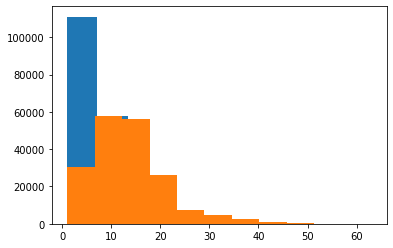

In [82]:
# 문장 길이 히스토그램

plt.hist(df_train['source_len'], bins=10)
plt.hist(df_train['tokenized_len'], bins=10)
plt.show()

In [83]:
# 128 넘는 개수
df_list = [df_train, df_dev]
df_name_list = ['train', 'dev']
length_count(df_list, df_name_list)

train 0
dev 0


In [84]:
# 토크나이저별 문장 길이
train_grouped = df_train.groupby(['tokenizer'])
dev_grouped = df_dev.groupby(['tokenizer'])
# test_grouped = df_test.groupby(['tokenizer'])

In [85]:
train_grouped.describe()

source_len                                                \
                         count      mean       std  min  25%  50%  75%   max   
tokenizer                                                                      
eojeol_composed_F      20400.0  7.266078  3.192853  1.0  5.0  7.0  9.0  25.0   
eojeol_pure_F          20441.0  7.295533  3.308869  1.0  5.0  7.0  9.0  55.0   
fixed_composed_F       20400.0  7.266078  3.192853  1.0  5.0  7.0  9.0  25.0   
fixed_grammatical_F    20400.0  7.266078  3.192853  1.0  5.0  7.0  9.0  25.0   
fixed_lexical_F        20425.0  7.291946  3.316301  1.0  5.0  7.0  9.0  63.0   
fixed_pure_F           20425.0  7.291946  3.316301  1.0  5.0  7.0  9.0  63.0   
orig_composed_F        20400.0  7.266078  3.192853  1.0  5.0  7.0  9.0  25.0   
orig_pure_F            20425.0  7.291114  3.308444  1.0  5.0  7.0  9.0  62.0   

                    tokenized_len                                              \
                            count       mean       std  min   25%   50%   75%   
tokenizer                                                                       
eojeol_composed_F         20400.0  11.633529  5.243651  1.0   9.0  11.0  13.0   
eojeol_pure_F             20441.0  11.299300  5.111271  1.0   8.0  10.0  13.0   
fixed_composed_F          20400.0  16.685735  7.227027  1.0  12.0  15.0  19.0   
fixed_grammatical_F       20400.0  16.696029  7.234234  1.0  12.0  15.0  19.0   
fixed_lexical_F           20425.0  16.625900  7.181699  1.0  12.0  15.0  19.0   
fixed_pure_F              20425.0  16.620808  7.182182  1.0  12.0  15.0  19.0   
orig_composed_F           20400.0  15.238725  6.760269  1.0  11.0  14.0  18.0   
orig_pure_F               20425.0  15.146291  6.715998  1.0  11.0  14.0  18.0   

                           
                      max  
tokenizer                  
eojeol_composed_F    48.0  
eojeol_pure_F        45.0  
fixed_composed_F     57.0  
fixed_grammatical_F  57.0  
fixed_lexical_F      56.0  
fixed_pure_F         56.0  
orig_composed_F      55.0  
orig_pure_F          55.0

eojeol_composed_F           AxesSubplot(0.1,0.679412;0.235294x0.220588)
eojeol_pure_F          AxesSubplot(0.382353,0.679412;0.235294x0.220588)
fixed_composed_F       AxesSubplot(0.664706,0.679412;0.235294x0.220588)
fixed_grammatical_F         AxesSubplot(0.1,0.414706;0.235294x0.220588)
fixed_lexical_F        AxesSubplot(0.382353,0.414706;0.235294x0.220588)
fixed_pure_F           AxesSubplot(0.664706,0.414706;0.235294x0.220588)
orig_composed_F                 AxesSubplot(0.1,0.15;0.235294x0.220588)
orig_pure_F                AxesSubplot(0.382353,0.15;0.235294x0.220588)
dtype: object

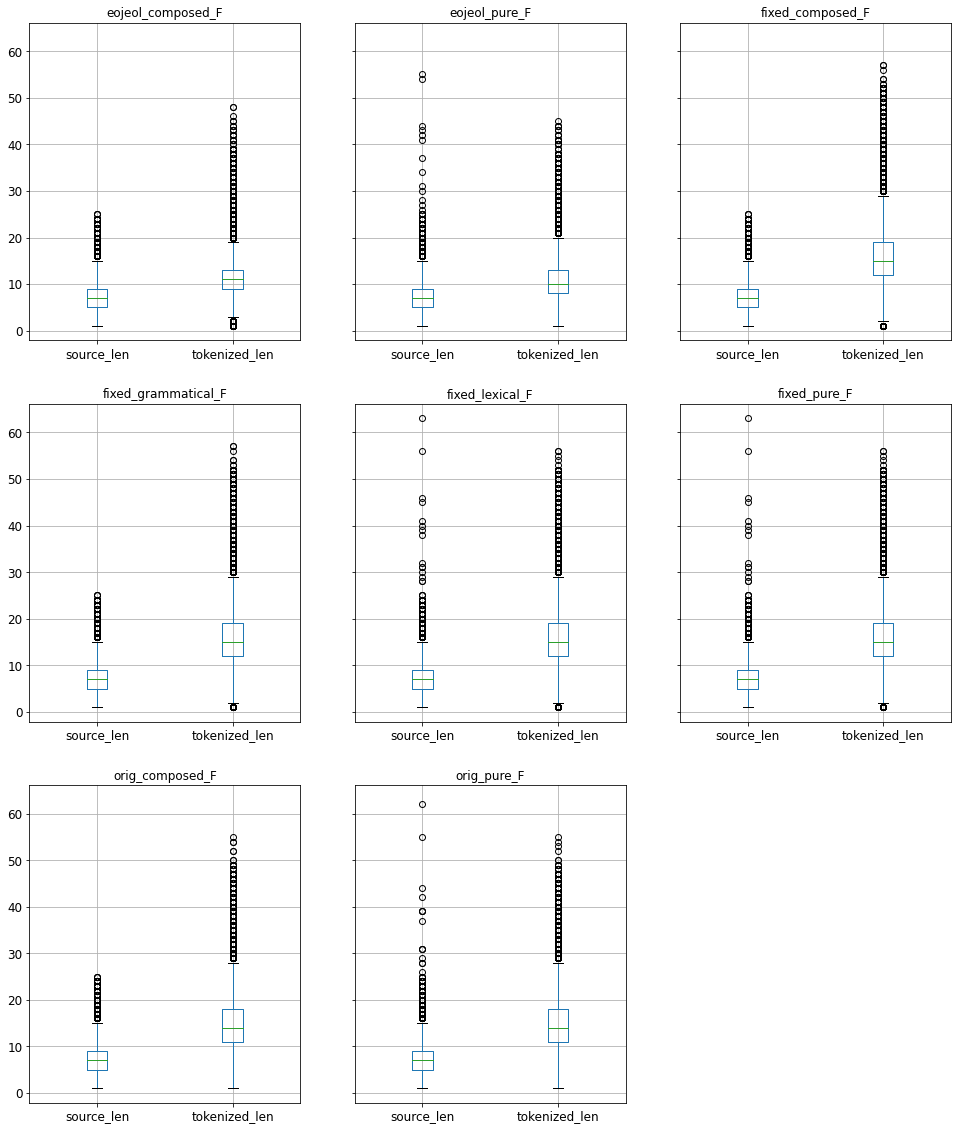

In [86]:
train_grouped.boxplot(fontsize=12, figsize=(16, 20))

eojeol_composed_F           AxesSubplot(0.1,0.679412;0.235294x0.220588)
eojeol_pure_F          AxesSubplot(0.382353,0.679412;0.235294x0.220588)
fixed_composed_F       AxesSubplot(0.664706,0.679412;0.235294x0.220588)
fixed_grammatical_F         AxesSubplot(0.1,0.414706;0.235294x0.220588)
fixed_lexical_F        AxesSubplot(0.382353,0.414706;0.235294x0.220588)
fixed_pure_F           AxesSubplot(0.664706,0.414706;0.235294x0.220588)
orig_composed_F                 AxesSubplot(0.1,0.15;0.235294x0.220588)
orig_pure_F                AxesSubplot(0.382353,0.15;0.235294x0.220588)
dtype: object

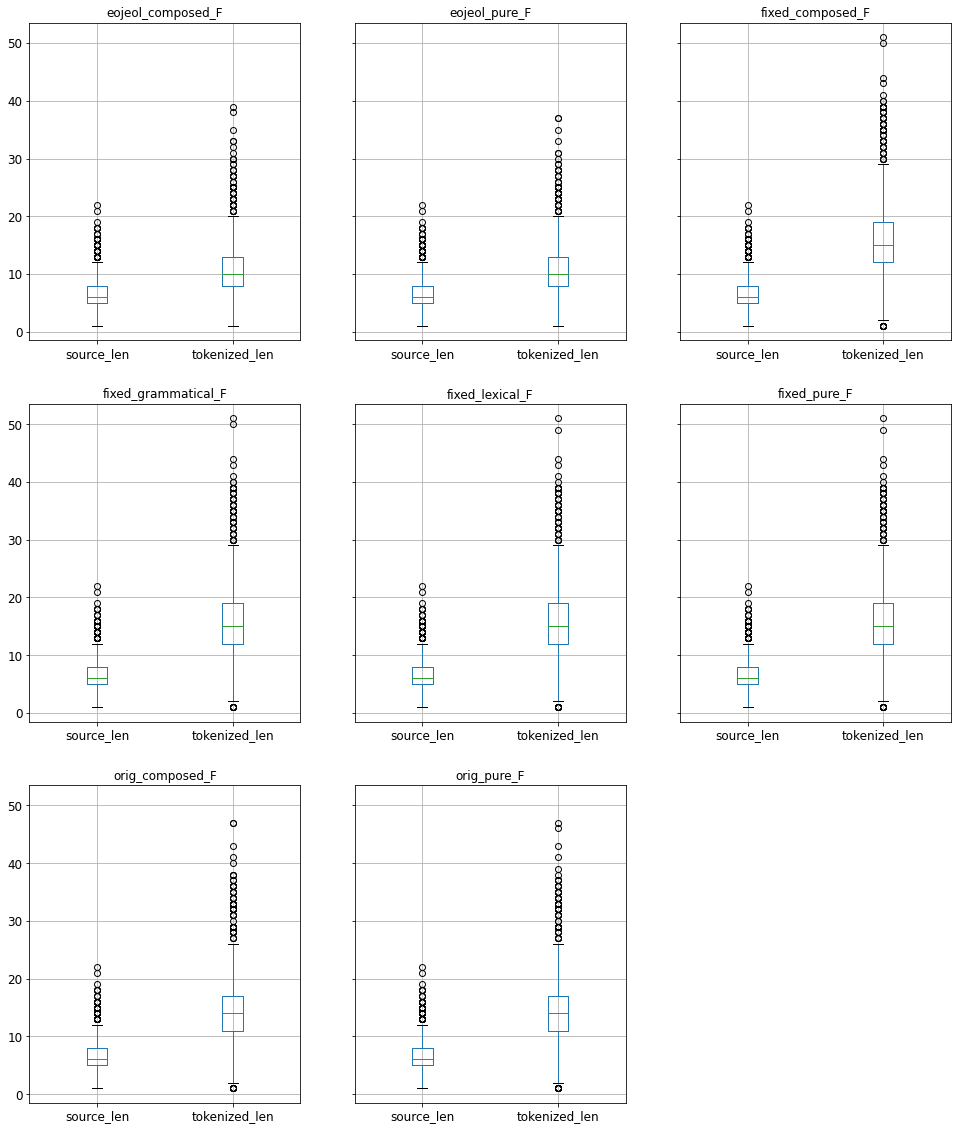

In [87]:
dev_grouped.boxplot(fontsize=12, figsize=(16, 20))

## dp

In [342]:
# json to tsv
dp_train = pd.read_csv('../KLUE-baseline/data/klue_benchmark/klue-dp-v1.1/klue-dp-v1.1_train.tsv',sep='delimiter', header=None)
dp_dev = pd.read_csv('../KLUE-baseline/data/klue_benchmark/klue-dp-v1.1/klue-dp-v1.1_dev.tsv', sep='delimiter', header=None)

/home/bongseok/virtualenv/acl/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [343]:
dp_train.columns = ['text']
dp_dev.columns = ['text']

In [344]:
df2_train = dp_train['text'].str.contains('## klue-dp')
df2_dev = dp_dev['text'].str.contains('## klue-dp')

In [345]:
df2_train

0         False
1         False
2         False
3         False
4         False
          ...  
124491    False
124492    False
124493    False
124494    False
124495    False
Name: text, Length: 124496, dtype: bool

In [346]:
df2_train = dp_train[df2_train]
df2_dev = dp_dev[df2_dev]

In [347]:
df2_train

,text
5,## klue-dp-v1_train_00000_wikitree\t해당 그림을 보면 ...
20,## klue-dp-v1_train_00001_wikitree\t이날 경연에는 곽진...
36,## klue-dp-v1_train_00002_wikitree\t최근 우리는 과거로...
51,## klue-dp-v1_train_00003_wikitree\t야권에서는 박근혜 ...
73,## klue-dp-v1_train_00004_wikitree\t만약 직장가입자가 ...
...,...
124453,## klue-dp-v1_train_09995_airbnb\t다만 높은 곳에 숙소가...
124462,## klue-dp-v1_train_09996_airbnb\t그리고 호스트님께서도 ...
124467,## klue-dp-v1_train_09997_airbnb\t숙소 위치가 광장이랑은...
124474,## klue-dp-v1_train_09998_airbnb\t하지만 기계가 차지하는...


In [350]:
df2_train['text'] = df2_train['text'].apply(lambda x: re.sub('## klue-dp-v1_train_.*\t', '', x))
df2_dev['text'] = df2_dev['text'].apply(lambda x: re.sub('## klue-dp-v1_dev_.*\t', '', x))

/tmp/ipykernel_25336/142792650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_train['text'] = df2_train['text'].apply(lambda x: re.sub('## klue-dp-v1_train_.*\t', '', x))
/tmp/ipykernel_25336/142792650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_dev['text'] = df2_dev['text'].apply(lambda x: re.sub('## klue-dp-v1_dev_.*\t', '', x))


In [351]:
df2_train

,text
5,"해당 그림을 보면 디즈니 공주들이 브리트니 스피어스의 앨범이나 뮤직비디오, 화보 속..."
20,"이날 경연에는 곽진언 씨, 김필 씨, 송유빈 군, 장우람 씨, 밴드 '버스터리드',..."
36,최근 우리는 과거로부터 이어져온 각종 적폐의 흔적들이 세월이 흘러도 후손들에게 상처...
51,야권에서는 박근혜 대통령까지 문제 삼고 있지만 이 문제는 박근혜 대통령과는 아무 상...
73,"만약 직장가입자가 근로소득 외에 사업소득, 이자, 배당, 임대소득 등을 합친 종합소..."
...,...
124453,다만 높은 곳에 숙소가있어서 대중교통 이용하시는 분들께 추천드려요!
124462,그리고 호스트님께서도 너무 친절하셨어요!
124467,숙소 위치가 광장이랑은 조금 거리가 있어요.
124474,하지만 기계가 차지하는 자리와 열기로 화장실 사용이 매우 힘들었습니다.


In [352]:
df2_train.to_csv('dp_orig_train.tsv', index=False)
df2_dev.to_csv('dp_orig_dev.tsv', index=False)

In [353]:
def load_data(file_path: str) -> Tuple[List[str]]:
    """
    file_path에 존재하는 tsv를 읽어서 bert_data.InputIds 형태로 변경해주는 함수입니다.
    각각의 row를 bert input으로 바꾸어주기 위한 함수입니다.
    각 row는 아래처럼 구성되어야 합니다.
    1. sentence
    3. label
    """
    sentences: List[str] = []
    #labels: List[int] = []

    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f.readlines()[1:]):
            splitted = line.strip()
            # if len(splitted) != 2:
            #     #print(f"[ERROR] {repr(line)}, line {i}")
            #     continue
            sentences.append(splitted)
     #       labels.append(label_to_index[splitted[1]])

    return sentences

In [354]:
task = 'dp'
train = load_data('dp_orig_train.tsv')
dev = load_data('dp_orig_dev.tsv')

corpus_list = [train, dev]
corpus_name_list = ['train', 'dev']

In [355]:
analysis(task, corpus_list, corpus_name_list, sent2=False)

In [356]:
# 길이 재기
df_train = pd.read_csv('dp_train.csv', delimiter='\t')
df_dev = pd.read_csv('dp_dev.csv',  delimiter='\t')

# 길이 칼럼 추가
df_train['source_len'] = df_train['source'].apply(lambda x: len(str(x).split()))
df_train['tokenized_len'] = df_train['tokenize_result'].apply(lambda x: len(str(x).split()))

df_dev['source_len'] = df_dev['source'].apply(lambda x: len(str(x).split()))
df_dev['tokenized_len'] = df_dev['tokenize_result'].apply(lambda x: len(str(x).split()))

In [357]:
# 기초 통계
df_train.describe()

,source_len,tokenized_len
count,120000.000000,120000.000000
mean,11.449100,24.849600
std,6.178295,13.571975
min,4.000000,5.000000
25%,6.000000,14.000000
50%,9.000000,20.000000
75%,15.000000,33.000000
max,38.000000,85.000000


In [358]:
# 기초 통계
df_dev.describe()

,source_len,tokenized_len
count,24000.000000,24000.000000
mean,11.248000,24.595625
std,6.152323,13.727328
min,4.000000,6.000000
25%,6.000000,14.000000
50%,9.000000,20.000000
75%,15.000000,32.000000
max,35.000000,80.000000


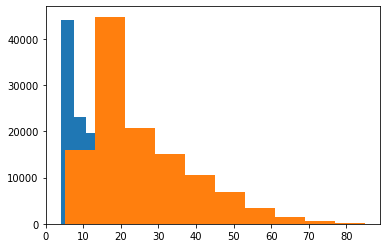

In [359]:
# 문장 길이 히스토그램

plt.hist(df_train['source_len'], bins=10)
plt.hist(df_train['tokenized_len'], bins=10)
plt.show()

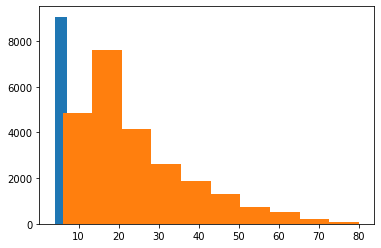

In [360]:
# 문장 길이 히스토그램

plt.hist(df_dev['source_len'], bins=10)
plt.hist(df_dev['tokenized_len'], bins=10)
plt.show()

In [361]:
# 128 넘는 개수
df_list = [df_train, df_dev]
df_name_list = ['train', 'dev']
length_count(df_list, df_name_list)

train 0
dev 0


In [362]:
# 토크나이저별 문장 길이
train_grouped = df_train.groupby(['tokenizer'])
dev_grouped = df_dev.groupby(['tokenizer'])
test_grouped = df_test.groupby(['tokenizer'])

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

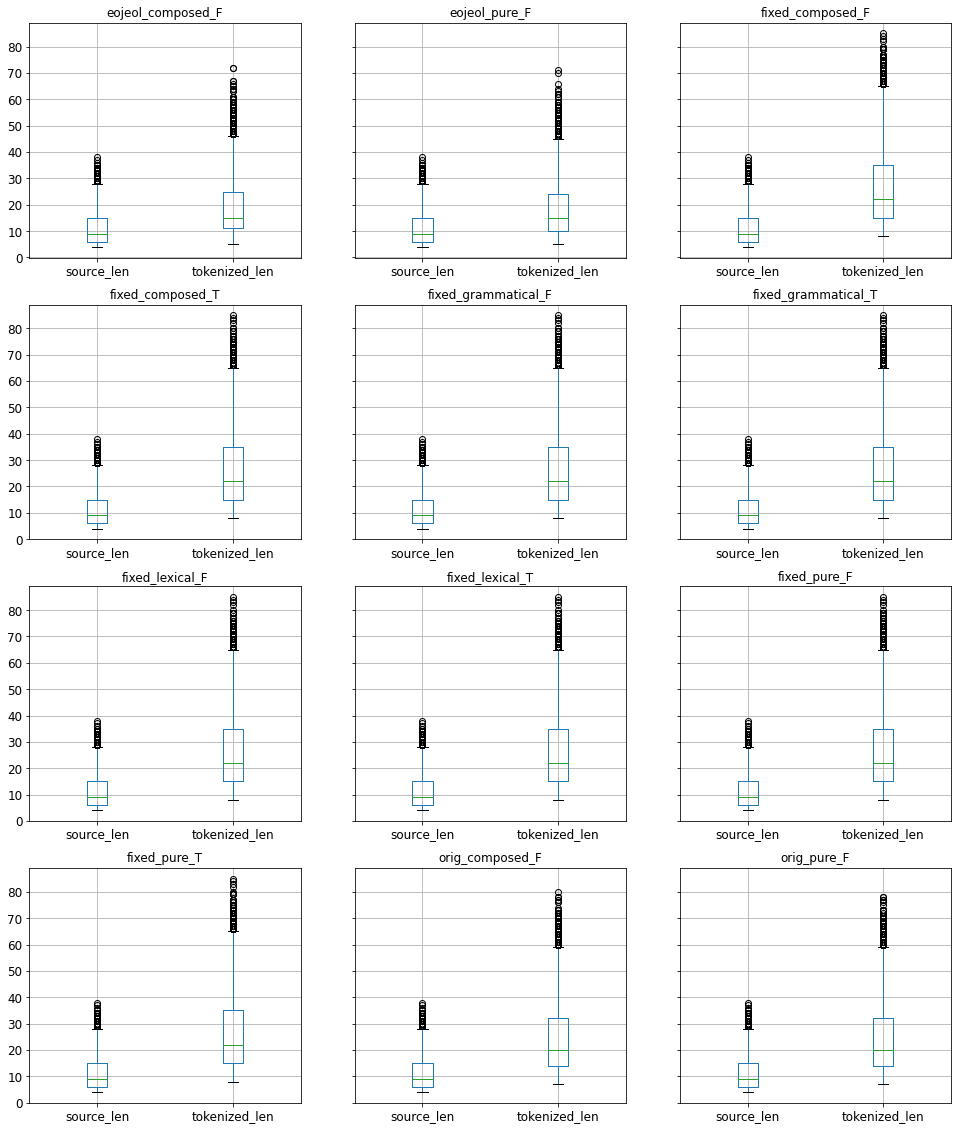

In [363]:
train_grouped.boxplot(fontsize=12, figsize=(16, 20))

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

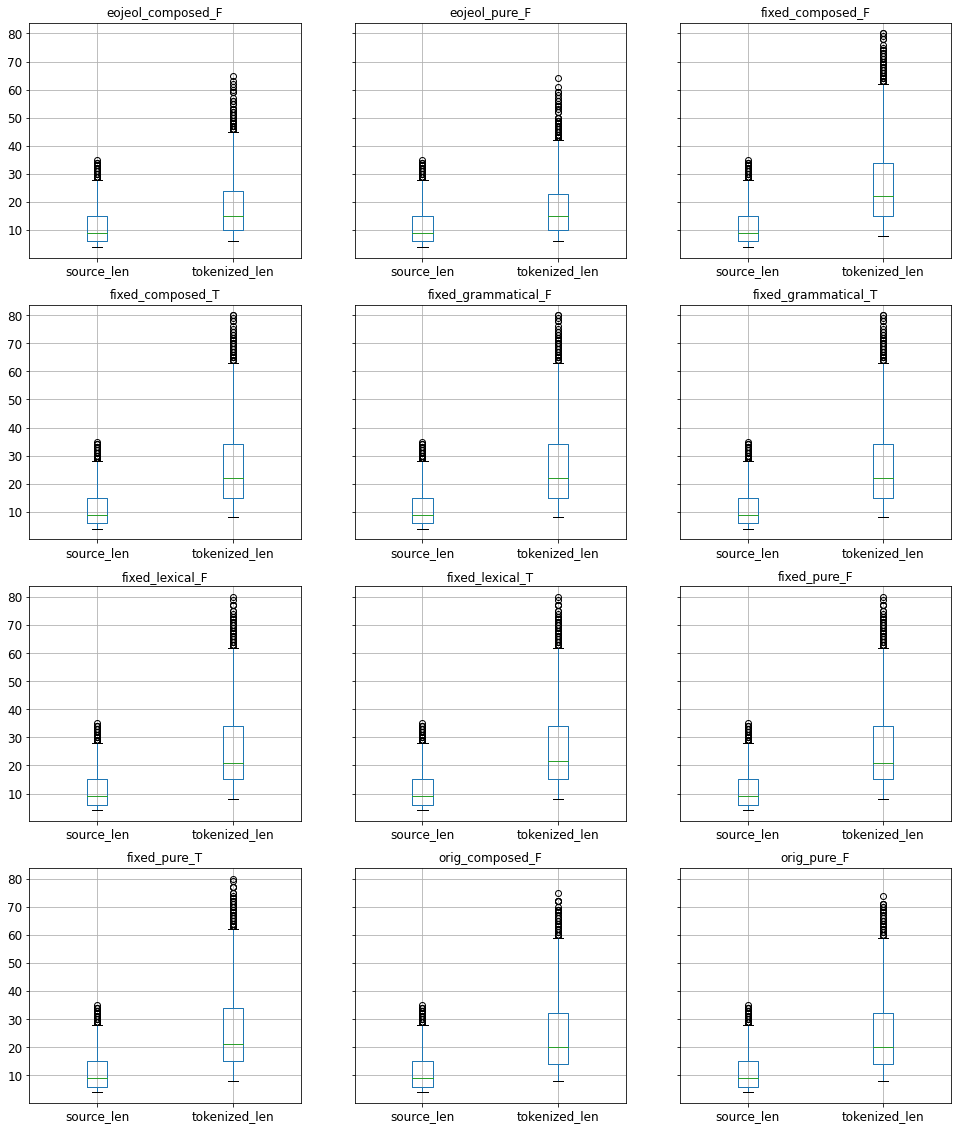

In [364]:
dev_grouped.boxplot(fontsize=12, figsize=(16, 20))

In [365]:
train_grouped.describe()

source_len                                                \
                         count     mean       std  min  25%  50%   75%   max   
tokenizer                                                                      
eojeol_composed_F      10000.0  11.4491  6.178578  4.0  6.0  9.0  15.0  38.0   
eojeol_pure_F          10000.0  11.4491  6.178578  4.0  6.0  9.0  15.0  38.0   
fixed_composed_F       10000.0  11.4491  6.178578  4.0  6.0  9.0  15.0  38.0   
fixed_composed_T       10000.0  11.4491  6.178578  4.0  6.0  9.0  15.0  38.0   
fixed_grammatical_F    10000.0  11.4491  6.178578  4.0  6.0  9.0  15.0  38.0   
fixed_grammatical_T    10000.0  11.4491  6.178578  4.0  6.0  9.0  15.0  38.0   
fixed_lexical_F        10000.0  11.4491  6.178578  4.0  6.0  9.0  15.0  38.0   
fixed_lexical_T        10000.0  11.4491  6.178578  4.0  6.0  9.0  15.0  38.0   
fixed_pure_F           10000.0  11.4491  6.178578  4.0  6.0  9.0  15.0  38.0   
fixed_pure_T           10000.0  11.4491  6.178578  4.0  6.0  9.0  15.0  38.0   
orig_composed_F        10000.0  11.4491  6.178578  4.0  6.0  9.0  15.0  38.0   
orig_pure_F            10000.0  11.4491  6.178578  4.0  6.0  9.0  15.0  38.0   

                    tokenized_len                                             \
                            count     mean        std  min   25%   50%   75%   
tokenizer                                                                      
eojeol_composed_F         10000.0  18.7569  10.448278  5.0  11.0  15.0  25.0   
eojeol_pure_F             10000.0  18.2543  10.171646  5.0  10.0  15.0  24.0   
fixed_composed_F          10000.0  26.5814  13.990373  8.0  15.0  22.0  35.0   
fixed_composed_T          10000.0  26.5891  13.994479  8.0  15.0  22.0  35.0   
fixed_grammatical_F       10000.0  26.5913  13.997366  8.0  15.0  22.0  35.0   
fixed_grammatical_T       10000.0  26.5922  13.997753  8.0  15.0  22.0  35.0   
fixed_lexical_F           10000.0  26.4577  13.890821  8.0  15.0  22.0  35.0   
fixed_lexical_T           10000.0  26.4614  13.893891  8.0  15.0  22.0  35.0   
fixed_pure_F              10000.0  26.4529  13.887839  8.0  15.0  22.0  35.0   
fixed_pure_T              10000.0  26.4561  13.889484  8.0  15.0  22.0  35.0   
orig_composed_F           10000.0  24.5840  13.081982  7.0  14.0  20.0  32.0   
orig_pure_F               10000.0  24.4179  12.972150  7.0  14.0  20.0  32.0   

                           
                      max  
tokenizer                  
eojeol_composed_F    72.0  
eojeol_pure_F        71.0  
fixed_composed_F     85.0  
fixed_composed_T     85.0  
fixed_grammatical_F  85.0  
fixed_grammatical_T  85.0  
fixed_lexical_F      85.0  
fixed_lexical_T      85.0  
fixed_pure_F         85.0  
fixed_pure_T         85.0  
orig_composed_F      80.0  
orig_pure_F          78.0

In [366]:
dev_grouped.describe()

source_len                                               \
                         count    mean       std  min  25%  50%   75%   max   
tokenizer                                                                     
eojeol_composed_F       2000.0  11.248  6.153733  4.0  6.0  9.0  15.0  35.0   
eojeol_pure_F           2000.0  11.248  6.153733  4.0  6.0  9.0  15.0  35.0   
fixed_composed_F        2000.0  11.248  6.153733  4.0  6.0  9.0  15.0  35.0   
fixed_composed_T        2000.0  11.248  6.153733  4.0  6.0  9.0  15.0  35.0   
fixed_grammatical_F     2000.0  11.248  6.153733  4.0  6.0  9.0  15.0  35.0   
fixed_grammatical_T     2000.0  11.248  6.153733  4.0  6.0  9.0  15.0  35.0   
fixed_lexical_F         2000.0  11.248  6.153733  4.0  6.0  9.0  15.0  35.0   
fixed_lexical_T         2000.0  11.248  6.153733  4.0  6.0  9.0  15.0  35.0   
fixed_pure_F            2000.0  11.248  6.153733  4.0  6.0  9.0  15.0  35.0   
fixed_pure_T            2000.0  11.248  6.153733  4.0  6.0  9.0  15.0  35.0   
orig_composed_F         2000.0  11.248  6.153733  4.0  6.0  9.0  15.0  35.0   
orig_pure_F             2000.0  11.248  6.153733  4.0  6.0  9.0  15.0  35.0   

                    tokenized_len                                              \
                            count     mean        std  min   25%   50%    75%   
tokenizer                                                                       
eojeol_composed_F          2000.0  18.4825  10.479389  6.0  10.0  15.0  24.00   
eojeol_pure_F              2000.0  17.9685  10.216736  6.0  10.0  15.0  23.00   
fixed_composed_F           2000.0  26.3305  14.184353  8.0  15.0  22.0  34.00   
fixed_composed_T           2000.0  26.3395  14.186997  8.0  15.0  22.0  34.25   
fixed_grammatical_F        2000.0  26.3420  14.191925  8.0  15.0  22.0  34.25   
fixed_grammatical_T        2000.0  26.3430  14.192324  8.0  15.0  22.0  34.25   
fixed_lexical_F            2000.0  26.2060  14.080152  8.0  15.0  21.0  34.00   
fixed_lexical_T            2000.0  26.2115  14.084174  8.0  15.0  21.5  34.00   
fixed_pure_F               2000.0  26.2025  14.079510  8.0  15.0  21.0  34.00   
fixed_pure_T               2000.0  26.2045  14.079481  8.0  15.0  21.0  34.00   
orig_composed_F            2000.0  24.3390  13.206979  8.0  14.0  20.0  32.00   
orig_pure_F                2000.0  24.1780  13.084300  8.0  14.0  20.0  32.00   

                           
                      max  
tokenizer                  
eojeol_composed_F    65.0  
eojeol_pure_F        64.0  
fixed_composed_F     80.0  
fixed_composed_T     80.0  
fixed_grammatical_F  80.0  
fixed_grammatical_T  80.0  
fixed_lexical_F      80.0  
fixed_lexical_T      80.0  
fixed_pure_F         80.0  
fixed_pure_T         80.0  
orig_composed_F      75.0  
orig_pure_F          74.0

## pc

In [383]:
def load_data(file_path: str) -> Tuple[List[str]]:
    """
    file_path에 존재하는 tsv를 읽어서 bert_data.InputIds 형태로 변경해주는 함수입니다.
    각각의 row를 bert input으로 바꾸어주기 위한 함수입니다.
    각 row는 아래처럼 구성되어야 합니다.
    1. sentence
    3. label
    """
    sentences: List[str] = []
    #labels: List[int] = []

    with open(file_path, "r", encoding="utf-8") as f:
        for i, line in enumerate(f.readlines()):
            splitted = line.strip().split("\t")
            if len(splitted) != 2:
                #print(f"[ERROR] {repr(line)}, line {i}")
                continue
            sentences.append(splitted[0])
     #       labels.append(label_to_index[splitted[1]])
    return sentences

In [384]:
task = 'pc'
train = load_data('../dataset/nlu_tasks/pc/pc_train.tsv')
dev = load_data('../dataset/nlu_tasks/pc/pc_dev.tsv')
test = load_data('../dataset/nlu_tasks/pc/pc_test.tsv')

corpus_list = [train, dev, test]
corpus_name_list = ['train', 'dev', 'test']

In [386]:
analysis(task, corpus_list, corpus_name_list, sent2=False)

In [397]:
# 길이 재기
df_train = pd.read_csv('pc_train.csv', delimiter='\t', error_bad_lines=False)
df_dev = pd.read_csv('pc_dev.csv', delimiter='\t')
df_test = pd.read_csv('pc_test.csv', delimiter='\t')

# 길이 칼럼 추가
df_train['source_len'] = df_train['source'].apply(lambda x: len(str(x).split()))
df_train['tokenized_len'] = df_train['tokenize_result'].apply(lambda x: len(str(x).split()))

df_dev['source_len'] = df_dev['source'].apply(lambda x: len(str(x).split()))
df_dev['tokenized_len'] = df_dev['tokenize_result'].apply(lambda x: len(str(x).split()))

df_test['source_len'] = df_test['source'].apply(lambda x: len(str(x).split()))
df_test['tokenized_len'] = df_test['tokenize_result'].apply(lambda x: len(str(x).split()))

/home/bongseok/virtualenv/acl/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 671294: expected 3 fields, saw 7\n'


In [398]:
# 기초 통계
df_train.describe()

,source_len,tokenized_len
count,1.077525e+06,1.077525e+06
mean,1.200700e+01,2.536826e+01
std,4.287729e+00,9.756231e+00
min,2.000000e+00,1.000000e+00
25%,9.000000e+00,1.800000e+01
50%,1.100000e+01,2.400000e+01
75%,1.500000e+01,3.200000e+01
max,3.300000e+01,9.400000e+01


In [399]:
# 기초 통계
df_dev.describe()

,source_len,tokenized_len
count,431016.000000,431016.000000
mean,12.023442,25.395041
std,4.279985,9.745516
min,1.000000,1.000000
25%,9.000000,18.000000
50%,12.000000,24.000000
75%,15.000000,32.000000
max,33.000000,82.000000


In [400]:
# 기초 통계
df_test.describe()

,source_len,tokenized_len
count,646524.000000,646524.000000
mean,12.013995,25.382280
std,4.287094,9.769748
min,1.000000,1.000000
25%,9.000000,18.000000
50%,12.000000,24.000000
75%,15.000000,32.000000
max,34.000000,82.000000


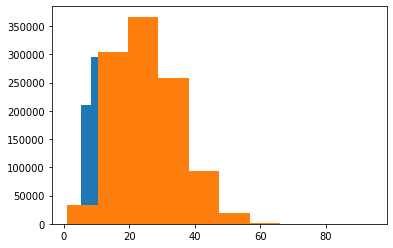

In [401]:
# 문장 길이 히스토그램

plt.hist(df_train['source_len'], bins=10)
plt.hist(df_train['tokenized_len'], bins=10)
plt.show()

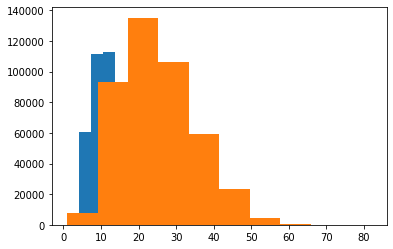

In [402]:
# 문장 길이 히스토그램

plt.hist(df_dev['source_len'], bins=10)
plt.hist(df_dev['tokenized_len'], bins=10)
plt.show()

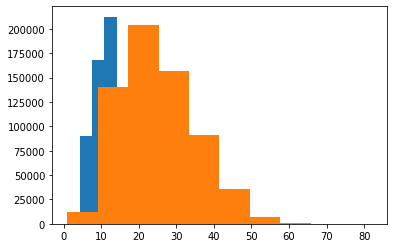

In [403]:
# 문장 길이 히스토그램

plt.hist(df_test['source_len'], bins=10)
plt.hist(df_test['tokenized_len'], bins=10)
plt.show()

In [404]:
# 128 넘는 개수
df_list = [df_train, df_dev, df_test]
df_name_list = ['train', 'dev', 'test']
length_count(df_list, df_name_list)

train 0
dev 0
test 0


In [405]:
# 토크나이저별 문장 길이
train_grouped = df_train.groupby(['tokenizer'])
dev_grouped = df_dev.groupby(['tokenizer'])
test_grouped = df_test.groupby(['tokenizer'])

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

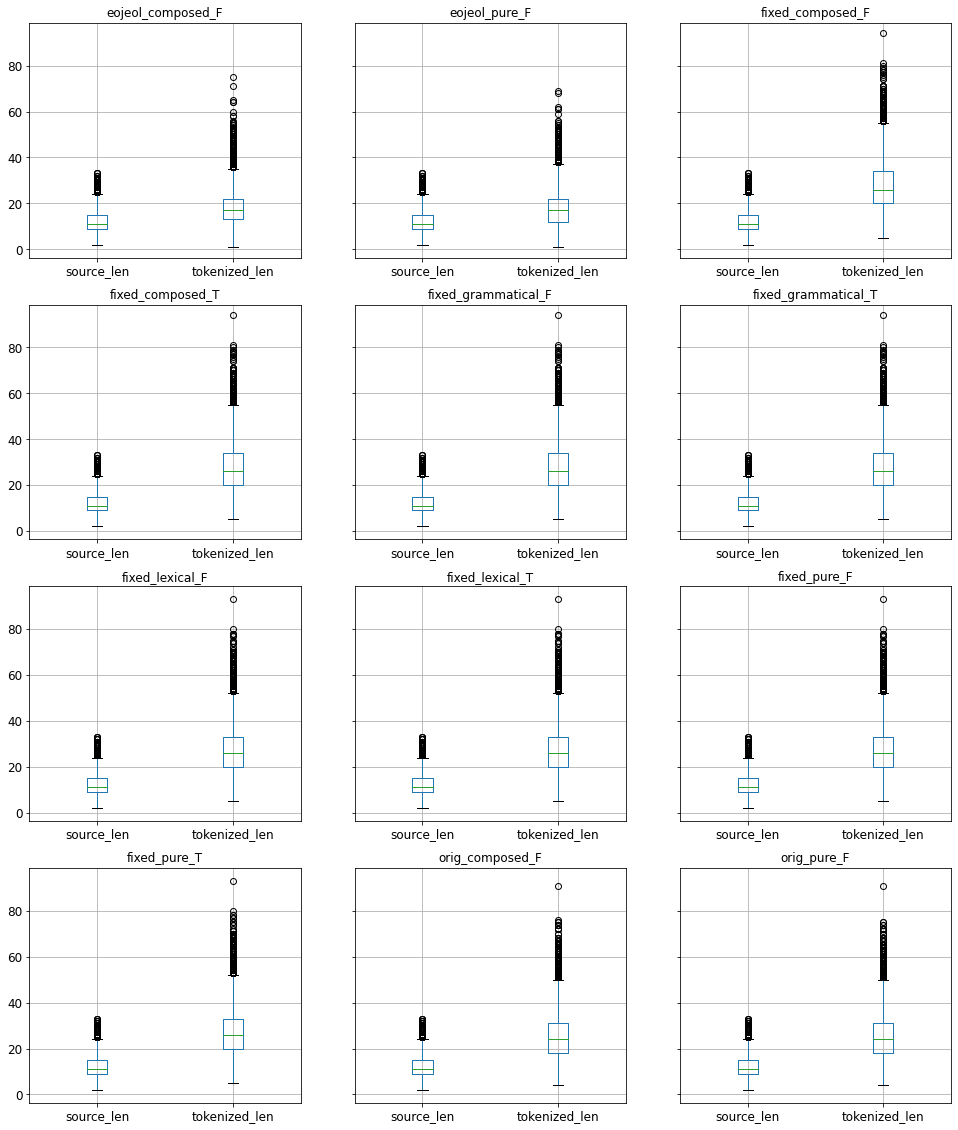

In [406]:
train_grouped.boxplot(fontsize=12, figsize=(16, 20))

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

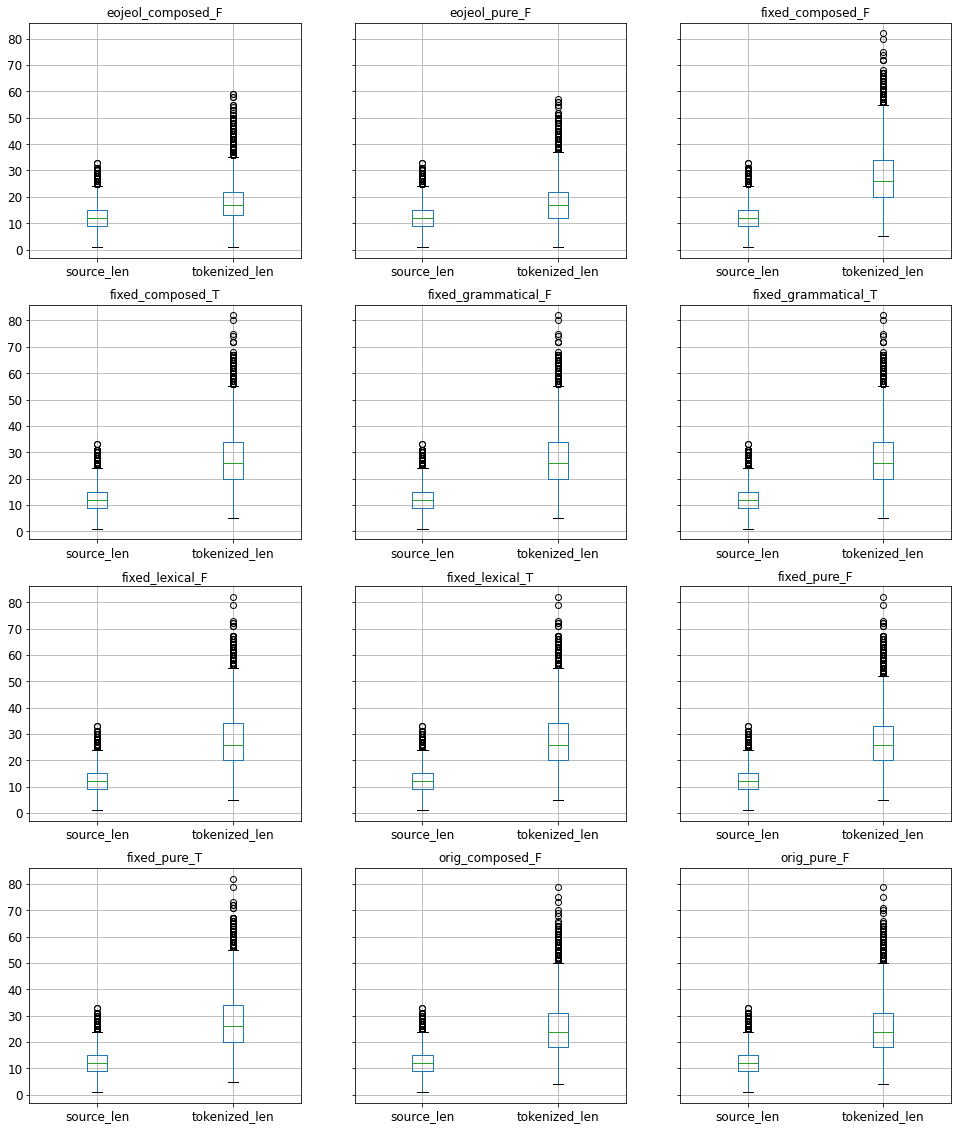

In [407]:
dev_grouped.boxplot(fontsize=12, figsize=(16, 20))

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

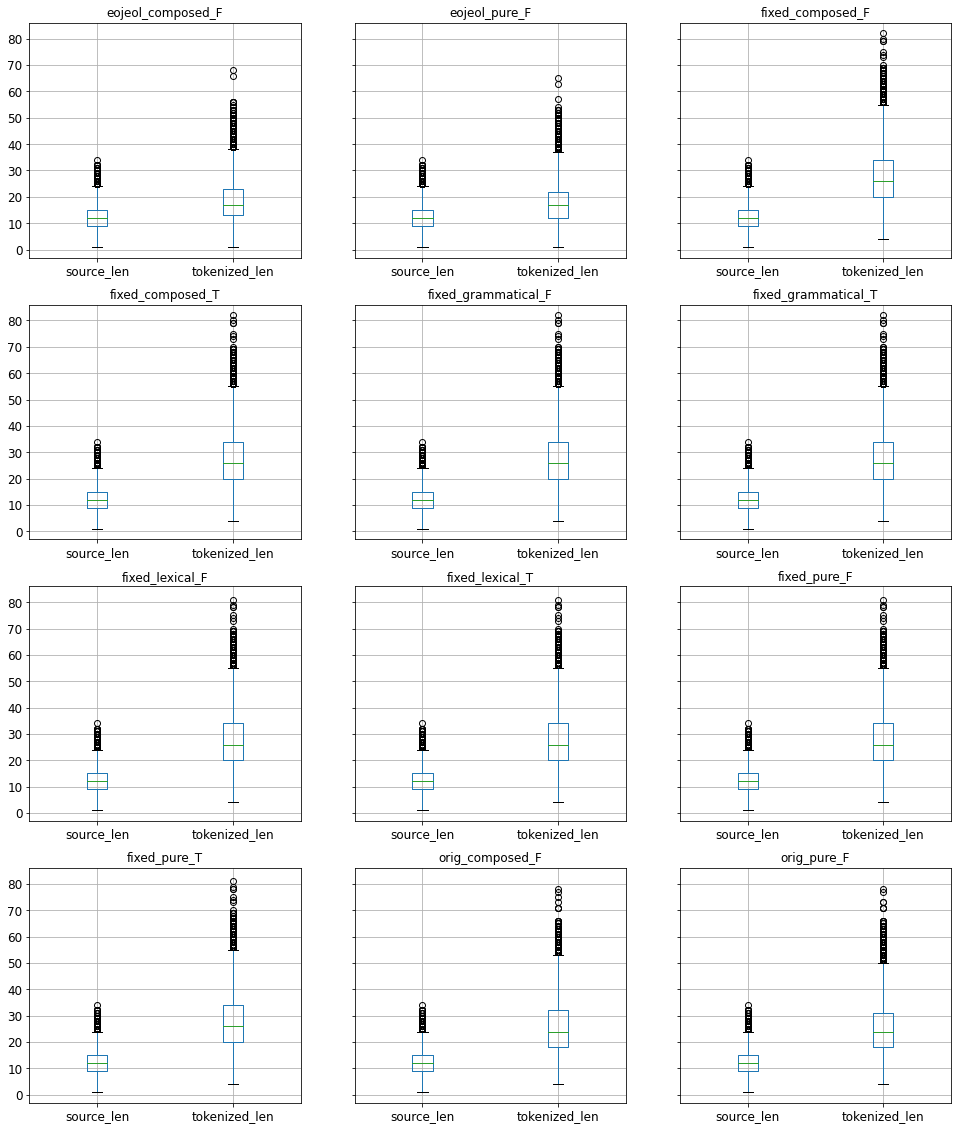

In [408]:
test_grouped.boxplot(fontsize=12, figsize=(16, 20))

In [410]:
train_grouped.describe()

source_len                                             \
                         count       mean       std  min  25%   50%   75%   
tokenizer                                                                   
eojeol_composed_F      89793.0  12.006972  4.287760  2.0  9.0  11.0  15.0   
eojeol_pure_F          89793.0  12.006972  4.287760  2.0  9.0  11.0  15.0   
fixed_composed_F       89794.0  12.007005  4.287748  2.0  9.0  11.0  15.0   
fixed_composed_T       89794.0  12.007005  4.287748  2.0  9.0  11.0  15.0   
fixed_grammatical_F    89794.0  12.007005  4.287748  2.0  9.0  11.0  15.0   
fixed_grammatical_T    89794.0  12.007005  4.287748  2.0  9.0  11.0  15.0   
fixed_lexical_F        89794.0  12.007005  4.287748  2.0  9.0  11.0  15.0   
fixed_lexical_T        89794.0  12.007005  4.287748  2.0  9.0  11.0  15.0   
fixed_pure_F           89794.0  12.007005  4.287748  2.0  9.0  11.0  15.0   
fixed_pure_T           89794.0  12.007005  4.287748  2.0  9.0  11.0  15.0   
orig_composed_F        89793.0  12.006972  4.287760  2.0  9.0  11.0  15.0   
orig_pure_F            89794.0  12.007005  4.287748  2.0  9.0  11.0  15.0   

                          tokenized_len                                        \
                      max         count       mean       std  min   25%   50%   
tokenizer                                                                       
eojeol_composed_F    33.0       89793.0  18.085653  7.101772  1.0  13.0  17.0   
eojeol_pure_F        33.0       89793.0  17.571147  6.897577  1.0  12.0  17.0   
fixed_composed_F     33.0       89794.0  27.315010  9.622090  5.0  20.0  26.0   
fixed_composed_T     33.0       89794.0  27.322616  9.624502  5.0  20.0  26.0   
fixed_grammatical_F  33.0       89794.0  27.325267  9.626243  5.0  20.0  26.0   
fixed_grammatical_T  33.0       89794.0  27.327282  9.626486  5.0  20.0  26.0   
fixed_lexical_F      33.0       89794.0  27.186516  9.561109  5.0  20.0  26.0   
fixed_lexical_T      33.0       89794.0  27.193075  9.564104  5.0  20.0  26.0   
fixed_pure_F         33.0       89794.0  27.180135  9.558251  5.0  20.0  26.0   
fixed_pure_T         33.0       89794.0  27.182740  9.559162  5.0  20.0  26.0   
orig_composed_F      33.0       89793.0  25.445747  9.138504  4.0  18.0  24.0   
orig_pure_F          33.0       89794.0  25.283727  9.065761  4.0  18.0  24.0   

                                 
                      75%   max  
tokenizer                        
eojeol_composed_F    22.0  75.0  
eojeol_pure_F        22.0  69.0  
fixed_composed_F     34.0  94.0  
fixed_composed_T     34.0  94.0  
fixed_grammatical_F  34.0  94.0  
fixed_grammatical_T  34.0  94.0  
fixed_lexical_F      33.0  93.0  
fixed_lexical_T      33.0  93.0  
fixed_pure_F         33.0  93.0  
fixed_pure_T         33.0  93.0  
orig_composed_F      31.0  91.0  
orig_pure_F          31.0  91.0

In [411]:
dev_grouped.describe()

source_len                                            \
                         count       mean      std  min  25%   50%   75%   
tokenizer                                                                  
eojeol_composed_F      35918.0  12.023442  4.28004  1.0  9.0  12.0  15.0   
eojeol_pure_F          35918.0  12.023442  4.28004  1.0  9.0  12.0  15.0   
fixed_composed_F       35918.0  12.023442  4.28004  1.0  9.0  12.0  15.0   
fixed_composed_T       35918.0  12.023442  4.28004  1.0  9.0  12.0  15.0   
fixed_grammatical_F    35918.0  12.023442  4.28004  1.0  9.0  12.0  15.0   
fixed_grammatical_T    35918.0  12.023442  4.28004  1.0  9.0  12.0  15.0   
fixed_lexical_F        35918.0  12.023442  4.28004  1.0  9.0  12.0  15.0   
fixed_lexical_T        35918.0  12.023442  4.28004  1.0  9.0  12.0  15.0   
fixed_pure_F           35918.0  12.023442  4.28004  1.0  9.0  12.0  15.0   
fixed_pure_T           35918.0  12.023442  4.28004  1.0  9.0  12.0  15.0   
orig_composed_F        35918.0  12.023442  4.28004  1.0  9.0  12.0  15.0   
orig_pure_F            35918.0  12.023442  4.28004  1.0  9.0  12.0  15.0   

                          tokenized_len                                        \
                      max         count       mean       std  min   25%   50%   
tokenizer                                                                       
eojeol_composed_F    33.0       35918.0  18.089844  7.078166  1.0  13.0  17.0   
eojeol_pure_F        33.0       35918.0  17.574614  6.877810  1.0  12.0  17.0   
fixed_composed_F     33.0       35918.0  27.346122  9.605544  5.0  20.0  26.0   
fixed_composed_T     33.0       35918.0  27.353862  9.608464  5.0  20.0  26.0   
fixed_grammatical_F  33.0       35918.0  27.356506  9.610544  5.0  20.0  26.0   
fixed_grammatical_T  33.0       35918.0  27.358845  9.610805  5.0  20.0  26.0   
fixed_lexical_F      33.0       35918.0  27.218247  9.544366  5.0  20.0  26.0   
fixed_lexical_T      33.0       35918.0  27.225458  9.547198  5.0  20.0  26.0   
fixed_pure_F         33.0       35918.0  27.211816  9.541402  5.0  20.0  26.0   
fixed_pure_T         33.0       35918.0  27.214795  9.542767  5.0  20.0  26.0   
orig_composed_F      33.0       35918.0  25.475583  9.133671  4.0  18.0  24.0   
orig_pure_F          33.0       35918.0  25.314800  9.058668  4.0  18.0  24.0   

                                 
                      75%   max  
tokenizer                        
eojeol_composed_F    22.0  59.0  
eojeol_pure_F        22.0  57.0  
fixed_composed_F     34.0  82.0  
fixed_composed_T     34.0  82.0  
fixed_grammatical_F  34.0  82.0  
fixed_grammatical_T  34.0  82.0  
fixed_lexical_F      34.0  82.0  
fixed_lexical_T      34.0  82.0  
fixed_pure_F         33.0  82.0  
fixed_pure_T         34.0  82.0  
orig_composed_F      31.0  79.0  
orig_pure_F          31.0  79.0

In [412]:
test_grouped.describe()

source_len                                             \
                         count       mean       std  min  25%   50%   75%   
tokenizer                                                                   
eojeol_composed_F      53877.0  12.013995  4.287131  1.0  9.0  12.0  15.0   
eojeol_pure_F          53877.0  12.013995  4.287131  1.0  9.0  12.0  15.0   
fixed_composed_F       53877.0  12.013995  4.287131  1.0  9.0  12.0  15.0   
fixed_composed_T       53877.0  12.013995  4.287131  1.0  9.0  12.0  15.0   
fixed_grammatical_F    53877.0  12.013995  4.287131  1.0  9.0  12.0  15.0   
fixed_grammatical_T    53877.0  12.013995  4.287131  1.0  9.0  12.0  15.0   
fixed_lexical_F        53877.0  12.013995  4.287131  1.0  9.0  12.0  15.0   
fixed_lexical_T        53877.0  12.013995  4.287131  1.0  9.0  12.0  15.0   
fixed_pure_F           53877.0  12.013995  4.287131  1.0  9.0  12.0  15.0   
fixed_pure_T           53877.0  12.013995  4.287131  1.0  9.0  12.0  15.0   
orig_composed_F        53877.0  12.013995  4.287131  1.0  9.0  12.0  15.0   
orig_pure_F            53877.0  12.013995  4.287131  1.0  9.0  12.0  15.0   

                          tokenized_len                                        \
                      max         count       mean       std  min   25%   50%   
tokenizer                                                                       
eojeol_composed_F    34.0       53877.0  18.104776  7.112290  1.0  13.0  17.0   
eojeol_pure_F        34.0       53877.0  17.586744  6.911433  1.0  12.0  17.0   
fixed_composed_F     34.0       53877.0  27.327709  9.638044  4.0  20.0  26.0   
fixed_composed_T     34.0       53877.0  27.336062  9.640805  4.0  20.0  26.0   
fixed_grammatical_F  34.0       53877.0  27.338382  9.642351  4.0  20.0  26.0   
fixed_grammatical_T  34.0       53877.0  27.340349  9.642790  4.0  20.0  26.0   
fixed_lexical_F      34.0       53877.0  27.199658  9.576351  4.0  20.0  26.0   
fixed_lexical_T      34.0       53877.0  27.206712  9.579515  4.0  20.0  26.0   
fixed_pure_F         34.0       53877.0  27.192939  9.573469  4.0  20.0  26.0   
fixed_pure_T         34.0       53877.0  27.196206  9.574488  4.0  20.0  26.0   
orig_composed_F      34.0       53877.0  25.458804  9.152536  4.0  18.0  24.0   
orig_pure_F          34.0       53877.0  25.299014  9.081419  4.0  18.0  24.0   

                                 
                      75%   max  
tokenizer                        
eojeol_composed_F    23.0  68.0  
eojeol_pure_F        22.0  65.0  
fixed_composed_F     34.0  82.0  
fixed_composed_T     34.0  82.0  
fixed_grammatical_F  34.0  82.0  
fixed_grammatical_T  34.0  82.0  
fixed_lexical_F      34.0  81.0  
fixed_lexical_T      34.0  81.0  
fixed_pure_F         34.0  81.0  
fixed_pure_T         34.0  81.0  
orig_composed_F      32.0  78.0  
orig_pure_F          31.0  78.0

## cb

In [413]:
def load_data(file_path: str) -> Tuple[List[str], List[str]]:
    """
    file_path에 존재하는 tsv를 읽어서 bert_data.InputIds 형태로 변경해주는 함수입니다.
    각각의 row를 bert input으로 바꾸어주기 위한 함수입니다.
    각 row는 아래처럼 구성되어야 합니다.
    1. sentence_a
    2. sentence_b
    3. label
    """
    
    # sentence_as = []
    # sentence_bs = []
    # labels = []

    # with open(file_path, "r", encoding="utf-8") as f:
    #     for i, line in enumerate(f.readlines()[1:]):
    #         splitted = line.strip().split("\t")
    #         if len(splitted) != 3:
    #             #print(f"[ERROR] {repr(line)}, line {i}")
    #             continue
    #         sentence_as.append(splitted[0])
    #         sentence_bs.append(splitted[1])
    #         labels.append(label_to_index[splitted[2]])

    data = pd.read_csv(file_path)

    sentence_as = data["Discourse"].to_list()
    sentence_bs = data["Proposition"].to_list()

#     label_to_idx = lambda x: 0 if x == "Entailment" else 1
#     #labels = [label_to_idx(label) for label in data["class_Restrict"].to_list()]

    return sentence_as, sentence_bs

In [415]:
task = 'cb'
train = load_data('../dataset/nlu_tasks/cb/NIKL_CB_2020_train.csv')
dev = load_data('../dataset/nlu_tasks/cb/NIKL_CB_2020_val.csv')

corpus_list = [train, dev]
corpus_name_list = ['train', 'dev']

In [416]:
analysis(task, corpus_list, corpus_name_list, sent2=True)

In [573]:
# 길이 재기
df_train = pd.read_csv('cb_train.csv', delimiter='\t')
df_dev = pd.read_csv('cb_dev.csv', delimiter='\t')

# 길이 칼럼 추가
df_train['source_len'] = df_train['source'].apply(lambda x: len(str(x).split()))
df_train['tokenized_len'] = df_train['tokenize_result'].apply(lambda x: len(str(x).split()))

df_dev['source_len'] = df_dev['source'].apply(lambda x: len(str(x).split()))
df_dev['tokenized_len'] = df_dev['tokenize_result'].apply(lambda x: len(str(x).split()))

df_test['source_len'] = df_test['source'].apply(lambda x: len(str(x).split()))
df_test['tokenized_len'] = df_test['tokenize_result'].apply(lambda x: len(str(x).split()))

In [418]:
# 기초 통계
df_train.describe()

,source_len,tokenized_len
count,9552.000000,9552.000000
mean,19.621859,42.241206
std,14.962929,32.774348
min,2.000000,3.000000
25%,7.000000,15.000000
50%,14.500000,30.000000
75%,30.000000,65.000000
max,85.000000,192.000000


In [419]:
# 기초 통계
df_dev.describe()

,source_len,tokenized_len
count,1920.000000,1920.000000
mean,18.268750,39.571875
std,14.135968,30.604693
min,2.000000,3.000000
25%,6.000000,14.000000
50%,13.000000,26.000000
75%,28.250000,62.000000
max,58.000000,130.000000


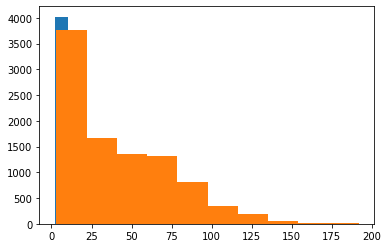

In [420]:
# 문장 길이 히스토그램

plt.hist(df_train['source_len'], bins=10)
plt.hist(df_train['tokenized_len'], bins=10)
plt.show()

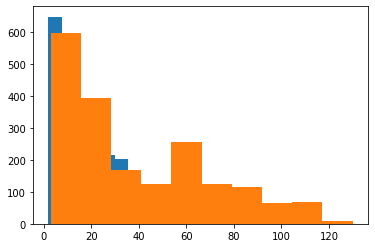

In [421]:
# 문장 길이 히스토그램

plt.hist(df_dev['source_len'], bins=10)
plt.hist(df_dev['tokenized_len'], bins=10)
plt.show()

In [422]:
# 128 넘는 개수
df_list = [df_train, df_dev]
df_name_list = ['train', 'dev']
length_count(df_list, df_name_list)

train 131
dev 4


In [554]:
# 토크나이저별 문장 길이
train_grouped = df_train.groupby(['tokenizer'])
dev_grouped = df_dev.groupby(['tokenizer'])

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

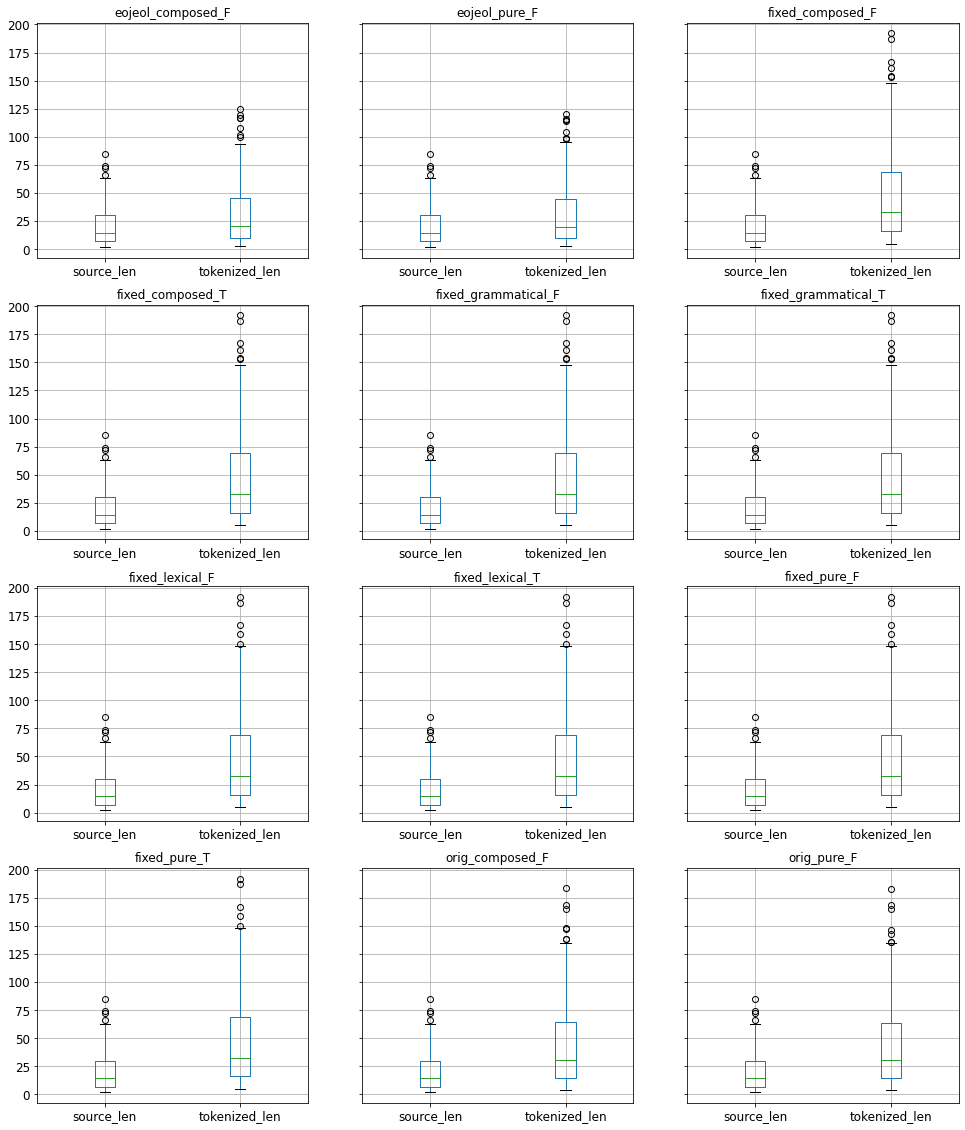

In [424]:
train_grouped.boxplot(fontsize=12, figsize=(16, 20))

eojeol_composed_F           AxesSubplot(0.1,0.736957;0.235294x0.163043)
eojeol_pure_F          AxesSubplot(0.382353,0.736957;0.235294x0.163043)
fixed_composed_F       AxesSubplot(0.664706,0.736957;0.235294x0.163043)
fixed_composed_T            AxesSubplot(0.1,0.541304;0.235294x0.163043)
fixed_grammatical_F    AxesSubplot(0.382353,0.541304;0.235294x0.163043)
fixed_grammatical_T    AxesSubplot(0.664706,0.541304;0.235294x0.163043)
fixed_lexical_F             AxesSubplot(0.1,0.345652;0.235294x0.163043)
fixed_lexical_T        AxesSubplot(0.382353,0.345652;0.235294x0.163043)
fixed_pure_F           AxesSubplot(0.664706,0.345652;0.235294x0.163043)
fixed_pure_T                    AxesSubplot(0.1,0.15;0.235294x0.163043)
orig_composed_F            AxesSubplot(0.382353,0.15;0.235294x0.163043)
orig_pure_F                AxesSubplot(0.664706,0.15;0.235294x0.163043)
dtype: object

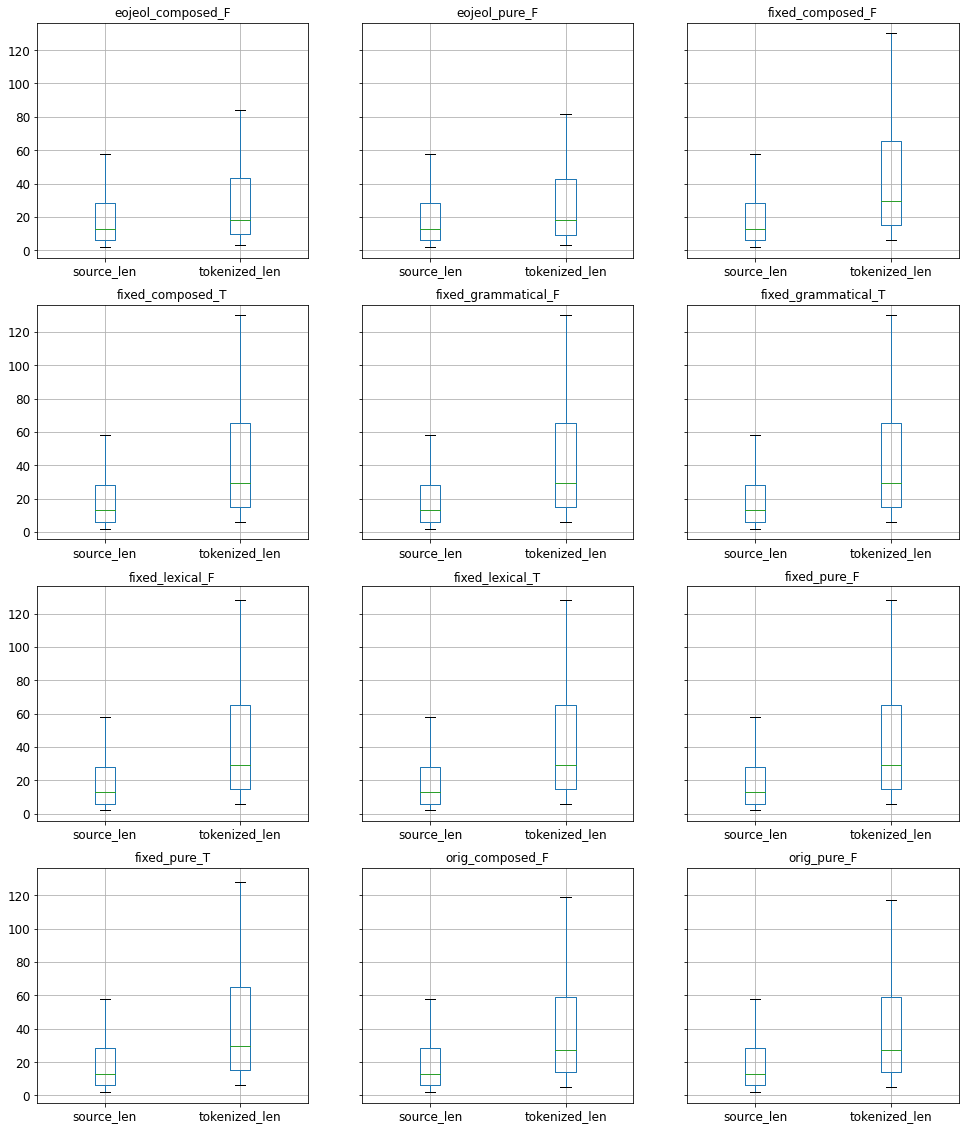

In [425]:
dev_grouped.boxplot(fontsize=12, figsize=(16, 20))

In [426]:
train_grouped.describe()

source_len                                              \
                         count       mean        std  min  25%   50%   75%   
tokenizer                                                                    
eojeol_composed_F        796.0  19.621859  14.971553  2.0  7.0  14.5  30.0   
eojeol_pure_F            796.0  19.621859  14.971553  2.0  7.0  14.5  30.0   
fixed_composed_F         796.0  19.621859  14.971553  2.0  7.0  14.5  30.0   
fixed_composed_T         796.0  19.621859  14.971553  2.0  7.0  14.5  30.0   
fixed_grammatical_F      796.0  19.621859  14.971553  2.0  7.0  14.5  30.0   
fixed_grammatical_T      796.0  19.621859  14.971553  2.0  7.0  14.5  30.0   
fixed_lexical_F          796.0  19.621859  14.971553  2.0  7.0  14.5  30.0   
fixed_lexical_T          796.0  19.621859  14.971553  2.0  7.0  14.5  30.0   
fixed_pure_F             796.0  19.621859  14.971553  2.0  7.0  14.5  30.0   
fixed_pure_T             796.0  19.621859  14.971553  2.0  7.0  14.5  30.0   
orig_composed_F          796.0  19.621859  14.971553  2.0  7.0  14.5  30.0   
orig_pure_F              796.0  19.621859  14.971553  2.0  7.0  14.5  30.0   

                          tokenized_len                                   \
                      max         count       mean        std  min   25%   
tokenizer                                                                  
eojeol_composed_F    85.0         796.0  29.581658  22.927496  3.0  10.0   
eojeol_pure_F        85.0         796.0  28.822864  22.340307  3.0  10.0   
fixed_composed_F     85.0         796.0  45.601759  34.401893  5.0  16.0   
fixed_composed_T     85.0         796.0  45.605528  34.403783  5.0  16.0   
fixed_grammatical_F  85.0         796.0  45.606784  34.404803  5.0  16.0   
fixed_grammatical_T  85.0         796.0  45.608040  34.406773  5.0  16.0   
fixed_lexical_F      85.0         796.0  45.418342  34.263457  5.0  16.0   
fixed_lexical_T      85.0         796.0  45.427136  34.274783  5.0  16.0   
fixed_pure_F         85.0         796.0  45.413317  34.259407  5.0  16.0   
fixed_pure_T         85.0         796.0  45.415829  34.260624  5.0  16.0   
orig_composed_F      85.0         796.0  42.301508  31.881653  4.0  15.0   
orig_pure_F          85.0         796.0  42.091709  31.719889  4.0  15.0   

                                         
                      50%    75%    max  
tokenizer                                
eojeol_composed_F    21.0  45.25  125.0  
eojeol_pure_F        20.0  45.00  120.0  
fixed_composed_F     33.0  69.00  192.0  
fixed_composed_T     33.0  69.00  192.0  
fixed_grammatical_F  33.0  69.00  192.0  
fixed_grammatical_T  33.0  69.00  192.0  
fixed_lexical_F      32.5  69.00  192.0  
fixed_lexical_T      32.5  69.00  192.0  
fixed_pure_F         32.5  69.00  192.0  
fixed_pure_T         32.5  69.00  192.0  
orig_composed_F      31.0  64.00  184.0  
orig_pure_F          31.0  63.25  183.0

In [427]:
dev_grouped.describe()

source_len                                              \
                         count      mean        std  min  25%   50%    75%   
tokenizer                                                                    
eojeol_composed_F        160.0  18.26875  14.176658  2.0  6.0  13.0  28.25   
eojeol_pure_F            160.0  18.26875  14.176658  2.0  6.0  13.0  28.25   
fixed_composed_F         160.0  18.26875  14.176658  2.0  6.0  13.0  28.25   
fixed_composed_T         160.0  18.26875  14.176658  2.0  6.0  13.0  28.25   
fixed_grammatical_F      160.0  18.26875  14.176658  2.0  6.0  13.0  28.25   
fixed_grammatical_T      160.0  18.26875  14.176658  2.0  6.0  13.0  28.25   
fixed_lexical_F          160.0  18.26875  14.176658  2.0  6.0  13.0  28.25   
fixed_lexical_T          160.0  18.26875  14.176658  2.0  6.0  13.0  28.25   
fixed_pure_F             160.0  18.26875  14.176658  2.0  6.0  13.0  28.25   
fixed_pure_T             160.0  18.26875  14.176658  2.0  6.0  13.0  28.25   
orig_composed_F          160.0  18.26875  14.176658  2.0  6.0  13.0  28.25   
orig_pure_F              160.0  18.26875  14.176658  2.0  6.0  13.0  28.25   

                          tokenized_len                                   \
                      max         count      mean        std  min    25%   
tokenizer                                                                  
eojeol_composed_F    58.0         160.0  27.34375  21.309651  3.0   9.75   
eojeol_pure_F        58.0         160.0  26.56875  20.768149  3.0   9.00   
fixed_composed_F     58.0         160.0  42.83125  32.191296  6.0  15.00   
fixed_composed_T     58.0         160.0  42.84375  32.209914  6.0  15.00   
fixed_grammatical_F  58.0         160.0  42.84375  32.209914  6.0  15.00   
fixed_grammatical_T  58.0         160.0  42.85625  32.209973  6.0  15.00   
fixed_lexical_F      58.0         160.0  42.68750  32.072871  6.0  15.00   
fixed_lexical_T      58.0         160.0  42.68750  32.072871  6.0  15.00   
fixed_pure_F         58.0         160.0  42.68125  32.067023  6.0  15.00   
fixed_pure_T         58.0         160.0  42.68750  32.072871  6.0  15.00   
orig_composed_F      58.0         160.0  39.52500  29.710754  5.0  14.00   
orig_pure_F          58.0         160.0  39.30625  29.505782  5.0  14.00   

                                         
                      50%    75%    max  
tokenizer                                
eojeol_composed_F    18.0  43.25   84.0  
eojeol_pure_F        18.0  43.00   82.0  
fixed_composed_F     29.5  65.25  130.0  
fixed_composed_T     29.5  65.25  130.0  
fixed_grammatical_F  29.5  65.25  130.0  
fixed_grammatical_T  29.5  65.25  130.0  
fixed_lexical_F      29.5  65.00  128.0  
fixed_lexical_T      29.5  65.00  128.0  
fixed_pure_F         29.5  65.00  128.0  
fixed_pure_T         29.5  65.00  128.0  
orig_composed_F      27.0  59.25  119.0  
orig_pure_F          27.0  59.25  117.0

In [565]:
# def filter_by_len(x):
#     return x['tokenized_len'] > 128
cond = df_train['tokenized_len'] > 128


train_grouped.get_group('fixed_composed_F')[cond]

/tmp/ipykernel_25336/3306568136.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_composed_F')[cond]


,source,tokenizer,tokenize_result,source_len,tokenized_len
1324,전경련은 계열사들끼리 지분(持分)을 꼬리에 꼬리를 무는 식으로 연결한 순환 출자 구...,fixed_composed_F,전경 ##련 은 계열사 들 끼리 지분 ( ) 을 꼬리 에 꼬리 를 무 는 식 으로 ...,60,135
1660,"박지성의 수비수 기용은 팀사정에서 따른 일시적인 보직변경이기는 하지만, 주목할 것은...",fixed_composed_F,박지성 의 수비수 기용 은 팀 사정 에서 따르 ᆫ 일시 적 이 ᆫ 보직 변경 이 기...,52,137
1756,첫째 한 나라의 정치지도세력들에 의해서 정해진 대외정책결정은 국내적 영역에서 이러한...,fixed_composed_F,첫째 한 나라 의 정치 지도 세력 들 에 의하 ㅕ서 정하 아 지 ᆫ 대외 정책 결정...,61,137
2236,2002년 동계 올림픽(2002 Winter Olympics)의 피겨 스케이팅 종목...,fixed_composed_F,2002 년 동계 올림픽 ( 2002 Winter Olymp ##ics ) 의 피겨...,72,148
3556,"조선 전기의 토지소유형태는 국가소유제, 지주적 소유제, 소농지 소유제 등의 제반 특...",fixed_composed_F,"조선 전기 의 토지 소유 형태 는 국가 소유 제 , 지주 적 소유 제 , 소 ##농...",58,161
4132,산호세 광산에서 만난 사람들의 열의는 더 뜨거웠다. 북부 이키케라는 도시에서 14시...,fixed_composed_F,산호 ##세 광산 에서 만나 ᆫ 사람 들 의 열의 는 더 뜨겁 었 다 . 북부 이키...,66,154
4780,그것이 국민주권으로부터 만들어지지 않고 지식인이나 특권 세력에 의해 만들어져야 한다...,fixed_composed_F,그것 이 국민 ##주 ##권 으로부터 만들 어 지 지 않 고 지식인 이나 특권 세력...,56,148
6076,즉 미국의 국내총생산(GDP)은 1995년 4/4분기에 전년도의 같은 기간에 비해 ...,fixed_composed_F,즉 미국 의 국내 총생산 ( GDP ) 은 1995 년 4 / 4 분기 에 전년도 ...,74,192
7372,팀당 15~16경기를 치른 K-리그가 반환점을 돌면서 본격적인 순위 경쟁 모드로 돌...,fixed_composed_F,팀 당 15 ~ 16 경기 를 치르 ᆫ K - 리그 가 반환 ##점 을 돌 면서 본...,58,136
7564,이번 사고는 금융기관에 해커가 침입한 것도 아니고 신용 정보를 아무렇게나 방치해 발...,fixed_composed_F,이번 사고 는 금융 기관 에 해커 가 침입 하 ᆫ 것 도 아니 고 신용 정보 를 아...,85,187


In [556]:
train_grouped.get_group('fixed_composed_T')[cond].count()

/tmp/ipykernel_25336/1297008893.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_composed_T')[cond].count()


source             14
tokenizer          14
tokenize_result    14
source_len         14
tokenized_len      14
dtype: int64

In [557]:
train_grouped.get_group('fixed_grammatical_T')[cond].count()

/tmp/ipykernel_25336/1976655224.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_grammatical_T')[cond].count()


source             14
tokenizer          14
tokenize_result    14
source_len         14
tokenized_len      14
dtype: int64

In [558]:
train_grouped.get_group('fixed_grammatical_F')[cond].count()

/tmp/ipykernel_25336/1133772654.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_grammatical_F')[cond].count()


source             14
tokenizer          14
tokenize_result    14
source_len         14
tokenized_len      14
dtype: int64

In [559]:
train_grouped.get_group('fixed_lexical_T')[cond].count()

/tmp/ipykernel_25336/3620636079.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_lexical_T')[cond].count()


source             14
tokenizer          14
tokenize_result    14
source_len         14
tokenized_len      14
dtype: int64

In [560]:
train_grouped.get_group('fixed_lexical_F')[cond].count()

/tmp/ipykernel_25336/3606793827.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_lexical_F')[cond].count()


source             14
tokenizer          14
tokenize_result    14
source_len         14
tokenized_len      14
dtype: int64

In [561]:
train_grouped.get_group('fixed_pure_T')[cond].count()

/tmp/ipykernel_25336/335682275.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_pure_T')[cond].count()


source             14
tokenizer          14
tokenize_result    14
source_len         14
tokenized_len      14
dtype: int64

In [562]:
train_grouped.get_group('fixed_pure_F')[cond].count()

/tmp/ipykernel_25336/628209145.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('fixed_pure_F')[cond].count()


source             14
tokenizer          14
tokenize_result    14
source_len         14
tokenized_len      14
dtype: int64

In [563]:
train_grouped.get_group('orig_composed_F')[cond].count()

/tmp/ipykernel_25336/4178865022.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('orig_composed_F')[cond].count()


source             10
tokenizer          10
tokenize_result    10
source_len         10
tokenized_len      10
dtype: int64

In [564]:
train_grouped.get_group('orig_pure_F')[cond].count()

/tmp/ipykernel_25336/3672549303.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_grouped.get_group('orig_pure_F')[cond].count()


source             9
tokenizer          9
tokenize_result    9
source_len         9
tokenized_len      9
dtype: int64

In [578]:
cond = df_train['tokenized_len'] > 128
df_train[cond].to_csv('cb_more_then_128_fixed_composed_F.tsv', sep='\t')